In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
import pickle
#import seaborn as sns

#%matplotlib notebook
#%matplotlib
%matplotlib inline
from logic_inspect import show_composite
from tboard import file2number
from nonlinearities import sigmoid
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from vis_utils import Pub_Model_Dirs, clist,listLineStyle
from calc_bounds import param_counter
from sklearn.metrics import classification_report
from sympy import preorder_traversal,postorder_traversal
import sympy
#clist=['g','c','m','y','k','b','r']
#listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

figure_folder='./figures/'

In [46]:
#log_dir='./logs/Model_0220_102206_triforce_mac_test'#Good video
#log_dir='./logs/Model_0504_214926_D3A3_newdata_adam'
#log_dir='./logs/Model_0504_220940_D3.1A3_adam'
#log_dir='./logs/Model_0504_222807_D1A3'
#log_dir='./logs/Model_0504_223859_D3A3_ValleyLikeD3'
#log_dir='./logs/Model_0504_230216_D3A3_ExtendD3_mul2'
#log_dir='./logs/Model_0504_231436_Dvalley2A3'
#log_dir='./logs/Model_0504_232644_DtwinA1_m60'
#log_dir='./logs/Pub_Model_0504_233722_D2A3_91acc'

#log_dir='./logs/Pub_Model_0504_233305_D1A3'
#log_dir='./logs/Pub_Model_0504_234152_D2A3'
#log_dir='./logs/Pub_Model_0504_234319_D3A3'
#log_dir='./logs/Pub_Model_0504_234437_D1A1'
#log_dir='./logs/Pub_Model_0504_234557_D2A1'
#log_dir='./logs/Pub_Model_0504_234822_D3A1'
#log_dir='./logs/Pub_Model_0504_235012_D1A2'
#log_dir='./logs/Pub_Model_0504_235058_D2A2'
#log_dir='./logs/Pub_Model_0504_235237_D3A2'

###Index by [arch#-1][data#-1]
#log_dir=Pub_Model_Dirs[0][1]
#log_dir=Pub_Model_Dirs[2][0]

#log_dir='./logs/Fig_Model_0505_003620_noise2D1A3'#Works well
#log_dir='./logs/Fig_Model_0505_005701_noise1D1A3'#works well
#log_dir='./logs/Fig_Model_0505_012310_noise3D1A3'#Great!
print 'using log_dir:',log_dir

using log_dir: ./logs/Pub_Model_0504_233305_D1A3


In [47]:
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(weights)
step=all_step[::dt]
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gridP=np.load(get_path('Prob','hmwatch',log_dir))#not used
GridX=resample_grid(gridX)#200
gX=resample_grid(gridX)#200  #standardized grid
HighResX=resample_grid(gridX,5000)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)


In [48]:
#len(step) is 100
#time_weights=[[w[-1],b[-1]] for w,b in del_weights]#d*2*wtshape
#time=50
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]#d*2*wtshape
PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)
#PLayers=vec_get_neuron_values(gX,del_weights)#Layers*(wpad,xpad,time,layersize)
np_net=np.squeeze(PLast[-1])#timexgX.shape
LastProb=sigmoid(np_net)

<IPython.core.display.Javascript object>


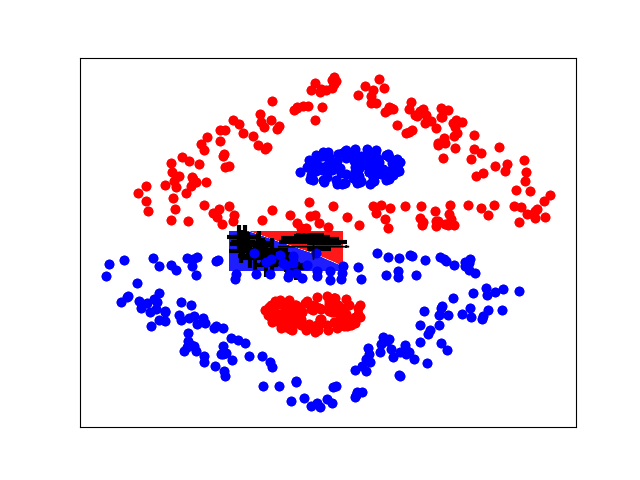

In [49]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b', ###used??
ctf=ax.contourf(gX[:,:,0],gX[:,:,1],LastProb,cmap=plt.cm.bwr_r,vmin=0,vmax=1.01,levels=levels)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
#plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

xmin=-1.5
xmax=1.5
ymin=-1.5
ymax=1.5
hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
plt.savefig(record_dir+'/'+id_str+'_dataclassif.pdf')

### Figure 1a

In [102]:
#log_dir='./logs/Fig_Model_0505_003620_noise2D1A3'#Works well
#log_dir='./logs/Fig_Model_0505_005701_noise1D1A3'#works well
log_dir='./logs/Fig_Model_0505_012310_noise3D1A3'#Great!
#log_dir=Pub_Model_Dirs[2][0]
print 'using log_dir:',log_dir
descrip=log_dir.split('_')[-1]
print descrip

using log_dir: ./logs/Fig_Model_0505_012310_noise3D1A3


In [104]:
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
#all_step=np.load(get_path('step','wwatch',log_dir))
#dt=10
#weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(all_weights)

#step=all_step[::dt]
gridX=np.load(get_path('gridX','hmwatch',log_dir))
#gridP=np.load(get_path('Prob','hmwatch',log_dir))#not used
#GridX=resample_grid(gridX)#200
gX=resample_grid(gridX)#200  #standardized grid
#HighResX=resample_grid(gridX,5000)
#npX=np.load(os.path.join(record_dir,'dataX.npy'))
#npY=np.load(os.path.join(record_dir,'dataY.npy'))
#Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
time_weights=[[w[time],b[time]] for w,b in del_weights]#d*2*wtshape
PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)
#PLayers=vec_get_neuron_values(gX,del_weights)#Layers*(wpad,xpad,time,layersize)
np_net=np.squeeze(PLast[-1])#timexgX.shape
LastProb=sigmoid(np_net)

<IPython.core.display.Javascript object>


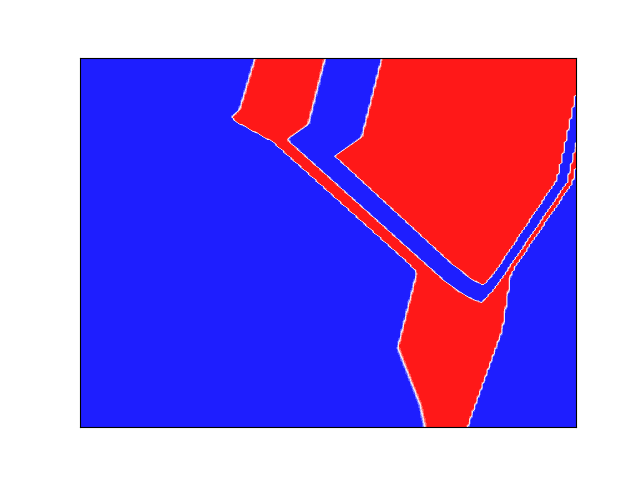

In [105]:
fig,ax=plt.subplots()
levels=np.linspace(0,1,11)#c='b', ###used??
ctf=ax.contourf(gX[:,:,0],gX[:,:,1],LastProb,cmap=plt.cm.bwr_r,vmin=0,vmax=1.01,levels=levels)
#ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
#ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
#plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# get width and height of axes object to compute 
# matching arrowhead length and width
# dps = fig.dpi_scale_trans.inverted()
# bbox = ax.get_window_extent().transformed(dps)
# width, height = bbox.width, bbox.height
# xmin=-1.5
# xmax=1.5
# ymin=-1.5
# ymax=1.5
# hw = 1./20.*(ymax-ymin) 
# hl = 1./20.*(xmax-xmin)
# lw = 1. # axis line width
# ohg = 0.3 # arrow overhang
# yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
# yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
# ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
#          head_width=hw, head_length=hl, overhang = ohg, 
#          length_includes_head= True, clip_on = False) 
# ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
#          head_width=yhw, head_length=yhl, overhang = ohg, 
#          length_includes_head= True, clip_on = False)
plt.savefig(record_dir+'/'+id_str+'_dataclassif_Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_Fig1a.png')

In [108]:
log_dir=Pub_Model_Dirs[2][0]  #[arch#-1][data#-1]
descrip=log_dir.split('_')[-1]
print 'using log_dir:',log_dir,' descrip:',descrip

using log_dir: ./logs/Pub_Model_0504_233305_D1A3
D1A3


<IPython.core.display.Javascript object>


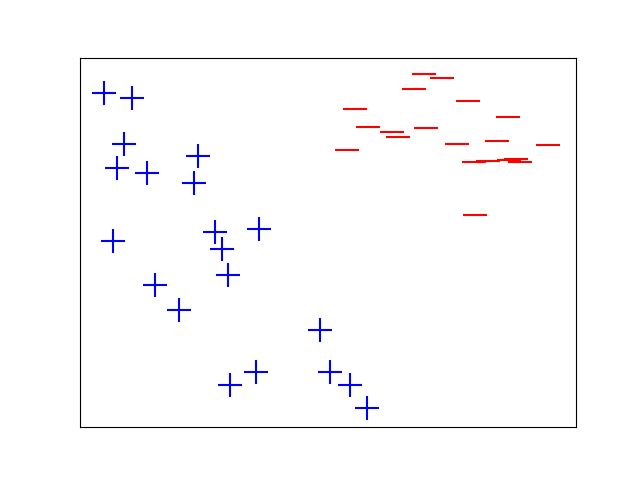

In [110]:
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/noanno_scatter_data.pdf')
plt.savefig(record_dir+'/noanno_scatter_data.png')
plt.savefig('./figures/Fig1/'+id_str+'_noannoscatter_'+descrip+'_Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_noannoscatter_'+descrip+'_Fig1a.png')

### data diagram

In [10]:
figname='Fig_data_diagram'
pthFig=os.path.join(figure_folder,figname)
if not os.path.exists(pthFig):
    os.makedirs(pthFig)

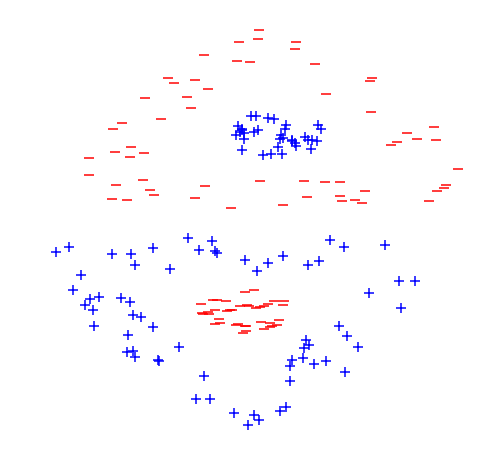

In [36]:
figname='Fig_data_diagram'
pthFig=os.path.join(figure_folder,figname)
if not os.path.exists(pthFig):
    os.mkdirs(pthFig)

from toydata import datafns,show_scatter,datafn_to_scatter
gen_data=datafns['data3']
data_dict=gen_data(return_numpy=True)
npX,npY=data_dict['input'],data_dict['label']

Xpos,Xneg=npX[np.where(npY>0)[0]],npX[np.where(npY<0)[0]]
plt.figure(figsize=(8.,8.))
dx=3#plot every
mksz=110#markersize
np.random.seed(22)
np.random.shuffle(Xpos)
np.random.shuffle(Xneg)
plt.scatter(Xpos[::dx,0],Xpos[::dx,1],c='b',marker='+',s=mksz)
plt.scatter(Xneg[::dx,0],Xneg[::dx,1],c='r',marker='_',s=mksz)
plt.axis('off')
name='FigDD_data3_scatter'
plt.savefig(os.path.join(pthFig, name+'.pdf'))
plt.savefig(os.path.join(pthFig, name+'.png'))

In [ ]:
fig,ax=plt.subplots()
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(record_dir+'/noanno_scatter_data.pdf')
plt.savefig(record_dir+'/noanno_scatter_data.png')
plt.savefig('./figures/Fig1/'+id_str+'_noannoscatter_'+descrip+'_Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_noannoscatter_'+descrip+'_Fig1a.png')

In [115]:
plt.show()

### Animations

In [123]:
#log_dir=Pub_Model_Dirs[0][0]  #[arch#-1][data#-1]
#log_dir=Pub_Model_Dirs[0][0]  #[arch#-1][data#-1]
#log_dir=Pub_Model_Dirs[1][2]  #[arch#-1][data#-1]


#log_dir=Pub_Model_Dirs[0][0]
#log_dir=Pub_Model_Dirs[0][1]
#log_dir=Pub_Model_Dirs[0][2]
#log_dir=Pub_Model_Dirs[1][0]
#log_dir=Pub_Model_Dirs[1][1]
#log_dir=Pub_Model_Dirs[1][2]
#log_dir=Pub_Model_Dirs[2][0]
log_dir=Pub_Model_Dirs[2][1]
#log_dir=Pub_Model_Dirs[2][2]

descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str

using log_dir: ./logs/Pub_Model_0504_234152_D2A3  descrip: D2A3 id str: 504234152


In [124]:
##Load All
record_dir=os.path.join(log_dir,'records')
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))#every 10 of 10000 iter

###Define Slicing###
dt=10 #every 100
iter_slice=np.arange(len(all_step))
#iter_slice=np.linspace(0,100,2).astype('int')
iter_slice=iter_slice[::dt]
#iter_slice=iter_slice[-1:]#just last entry
dt_weights=[[w[iter_slice],b[iter_slice]] for w,b in all_weights]
#dt_weights=[[w[::dt],b[::dt]] for w,b in all_weights]
del_weights=get_del_weights(dt_weights)
#step=all_step[::dt]
step=all_step[iter_slice]

arch=[b.shape[-1] for w,b in dt_weights[:-1]]#net architecture
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
#HighResX=resample_grid(gridX,5000)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
# PLayers=vec_get_neuron_values(gX,del_weights) #d*(TimexgX1xgX2xnl)

In [125]:
#d*(wpad,xpad,time,layersize)
PLayers=vec_get_neuron_values(gX,del_weights) #d*(TimexgX1xgX2xnl)

#linestyles=listLineStyle[l]
lLS=listLineStyle[:-1]#Save dotted for boundary

#colormap = plt.cm.gist_ncar
#col_cycle=cycler('color', clist)
def draw(time,layer,ax,use_color=True):
    ax.set_prop_cycle(plt.cycler('color', clist))
    
    contour_list=[]
    l=layer
    
    time_PLayers=[A[time] for A in PLayers]
        
#    if len(time_PLayers[l].shape)==2:#only one neuron in layer
#        listL=[time_PLayers[l]]
#    else:
#        listL=splitL(time_PLayers[l])
    listL=splitL(time_PLayers[l])
    
    if layer+1<len(PLayers):
        ls=lLS[layer%len(lLS)]
    else:
        ls=listLineStyle[-1]
    
    nl=len(listL)
    #plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, nl)])
    #colors=[colormap(i) for i in np.linspace(0, 0.9, nl)]
    for i,Pneu in enumerate(listL):
        if use_color:
            ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i%len(clist)],levels=[0.],linestyles=ls)
        else:
            ctf=ax.contour(gX0,gX1,Pneu,levels=[0.],linestyles=ls)
#        ctf=ax.contour(gX0,gX1,Pneu,levels=[0.])
#        ctf=ax.contour(gX0,gX1,Pneu,colors=next(col_cycle),levels=[0.])
        contour_list.append(ctf)
    return contour_list

<IPython.core.display.Javascript object>


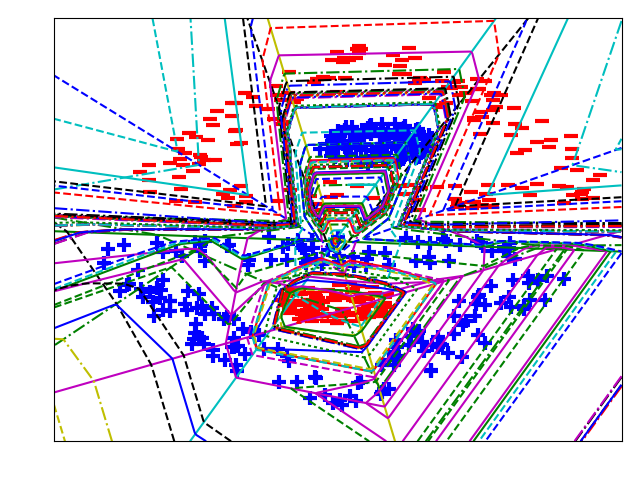

In [116]:
#layer=3


###ANIMATION###

#fig,ax=plt.subplots(figsize=(14,12))
#fig,axes=plt.subplots(2,2)
fig,ax=plt.subplots()

gX0,gX1=gX[:,:,0],gX[:,:,1]

CT_lists=[]
d=len(PLayers)-1
for l in range(d+1):
    contour_list=draw(0,l,ax)
    CT_lists.append(contour_list)
    
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

plt.tight_layout()

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

def animate(time):
    global CT_lists
    for contour_list in CT_lists:
        for ctf in contour_list:
            for c in ctf.collections:
                c.remove()
    CT_lists=[]
    for l in range(d+1):
        CT_lists.append(draw(time,l,ax))
    return CT_lists

#anim = animation.FuncAnimation(fig, animate, frames=len(step), repeat=True, interval=10)
del_t=1
anim_deep = animation.FuncAnimation(fig, animate, frames=np.arange(1,len(PLayers[0]),del_t), repeat=True,interval=10)
#anim = animation.FuncAnimation(fig, animate, frames=np.arange(1,10000,del_t), repeat=True,interval=10)#, interval=500)

In [117]:
fps=25
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Me'),fps=fps)
anim_deep.save(record_dir+'/'+id_str+'_overlay_'+'_fps'+str(fps)+
               'start'+str(iter_slice[0])+
                'end'+str(iter_slice[-1])+
               'dur'+str(len(iter_slice))+
               '.mp4', writer=writer)

### Count Sig0 vs Sig

In [108]:
#log_dir=Pub_Model_Dirs[0][0]
#log_dir=Pub_Model_Dirs[0][1]
#log_dir=Pub_Model_Dirs[0][2]
#log_dir=Pub_Model_Dirs[1][0]
#log_dir=Pub_Model_Dirs[1][1]
#log_dir=Pub_Model_Dirs[1][2]
#log_dir=Pub_Model_Dirs[2][0]
#log_dir=Pub_Model_Dirs[2][1]
#log_dir=Pub_Model_Dirs[2][2]

for Arch in Pub_Model_Dirs:
    for log_dir in Arch: 
        descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
        print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
        record_dir=os.path.join(log_dir,'records')
        bounds_dir=os.path.join(log_dir,'bounds')        
        pth_Sig =record_dir+'/res5000_Sig.npy'
        pth_Sig0=record_dir+'/res5000_Sig0.npy'
        Sig=np.load(pth_Sig)
        Sig0=np.load(pth_Sig0)

        print '\tLenSig:',len(Sig),'   LenSig0:',len(Sig0)

using log_dir: ./logs/Pub_Model_0504_234437_D1A1  descrip: D1A1 id str: 504234437
	LenSig: 36    LenSig0: 1
using log_dir: ./logs/Pub_Model_0504_234557_D2A1  descrip: D2A1 id str: 504234557
	LenSig: 121    LenSig0: 10
using log_dir: ./logs/Pub_Model_0504_234822_D3A1  descrip: D3A1 id str: 504234822
	LenSig: 247    LenSig0: 38
using log_dir: ./logs/Pub_Model_0504_235012_D1A2  descrip: D1A2 id str: 504235012
	LenSig: 80    LenSig0: 2
using log_dir: ./logs/Pub_Model_0504_235058_D2A2  descrip: D2A2 id str: 504235058
	LenSig: 166    LenSig0: 8
using log_dir: ./logs/Pub_Model_0504_235237_D3A2  descrip: D3A2 id str: 504235237
	LenSig: 507    LenSig0: 19
using log_dir: ./logs/Pub_Model_0504_233305_D1A3  descrip: D1A3 id str: 504233305
	LenSig: 167    LenSig0: 2
using log_dir: ./logs/Pub_Model_0504_234152_D2A3  descrip: D2A3 id str: 504234152
	LenSig: 622    LenSig0: 6
using log_dir: ./logs/Pub_Model_0504_234319_D3A3  descrip: D3A3 id str: 504234319
	LenSig: 2884    LenSig0: 144


LenSig: 2884    LenSig0: 144


## D2A3 Bool Expansion

In [4]:
log_dir=Pub_Model_Dirs[2][1]
descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
record_dir=os.path.join(log_dir,'records')
bounds_dir=os.path.join(log_dir,'bounds')

FBF=os.path.join(log_dir,'FigBool')#FigBoolFolder


using log_dir: ./logs/Pub_Model_0504_234152_D2A3  descrip: D2A3 id str: 504234152


In [11]:
##Load All
record_dir=os.path.join(log_dir,'records')
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))#every 10 of 10000 iter

###Define Slicing###
dt=10 #every 100
iter_slice=np.arange(len(all_step))
#iter_slice=np.linspace(0,100,2).astype('int')
# iter_slice=iter_slice[::dt]
iter_slice=iter_slice[-1:]#just last entry
dt_weights=[[w[iter_slice],b[iter_slice]] for w,b in all_weights]
#dt_weights=[[w[::dt],b[::dt]] for w,b in all_weights]
del_weights=get_del_weights(dt_weights)
#step=all_step[::dt]
step=all_step[iter_slice]

arch=[b.shape[-1] for w,b in dt_weights[:-1]]#net architecture
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
#HighResX=resample_grid(gridX,5000)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
# PLayers=vec_get_neuron_values(gX,del_weights) #d*(TimexgX1xgX2xnl)

In [12]:
#d*(wpad,xpad,time,layersize)
PLayers=vec_get_neuron_values(gX,del_weights) #d*(TimexgX1xgX2xnl)

#linestyles=listLineStyle[l]
lLS=listLineStyle[:-1]#Save dotted for boundary

#colormap = plt.cm.gist_ncar
#col_cycle=cycler('color', clist)
def draw(time,layer,ax,use_color=True):
    ax.set_prop_cycle(plt.cycler('color', clist))
    
    contour_list=[]
    l=layer
    
    time_PLayers=[A[time] for A in PLayers]
        
#    if len(time_PLayers[l].shape)==2:#only one neuron in layer
#        listL=[time_PLayers[l]]
#    else:
#        listL=splitL(time_PLayers[l])
    listL=splitL(time_PLayers[l])
    
    if layer+1<len(PLayers):
        ls=lLS[layer%len(lLS)]
    else:
        ls=listLineStyle[-1]
    
    nl=len(listL)
    #plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, nl)])
    #colors=[colormap(i) for i in np.linspace(0, 0.9, nl)]
    for i,Pneu in enumerate(listL):
        if use_color:
            ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i%len(clist)],levels=[0.],linestyles=ls)
        else:
            ctf=ax.contour(gX0,gX1,Pneu,levels=[0.],linestyles=ls)
#        ctf=ax.contour(gX0,gX1,Pneu,levels=[0.])
#        ctf=ax.contour(gX0,gX1,Pneu,colors=next(col_cycle),levels=[0.])
        contour_list.append(ctf)
    return contour_list

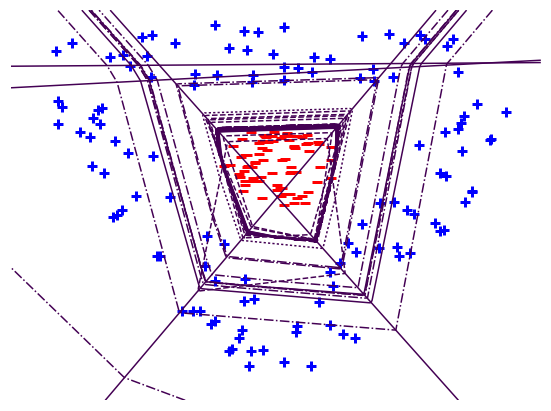

In [13]:
#Single Frame from Neuron States
fig,ax=plt.subplots(figsize=(8,6))

# gX0,gX1=gX[:,:,0],gX[:,:,1]
#CT_lists=[]
d=len(PLayers)-1
for l in range(d+1):
    contour_list=draw(-1,l,ax,use_color=False)
#    CT_lists.append(contour_list)
    
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

plt.tight_layout()

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')
ax.axis('off')

plt.savefig(os.path.join(FBF,descrip+'_tfinal_LinearRegions.png'))
plt.savefig(os.path.join(FBF,descrip+'_tfinal_LinearRegions.pdf'))

In [6]:
Gamma=np.load(FBF+'/GammaTree.npy').reshape([-1,2,1])
Beta=np.load(FBF+'/BetaTree.npy')


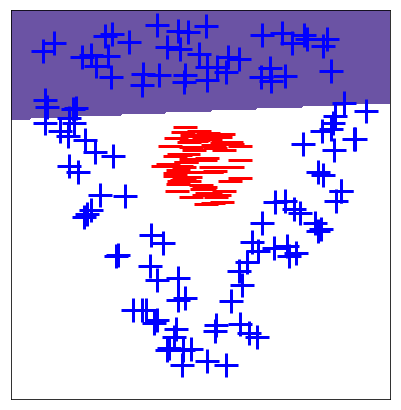

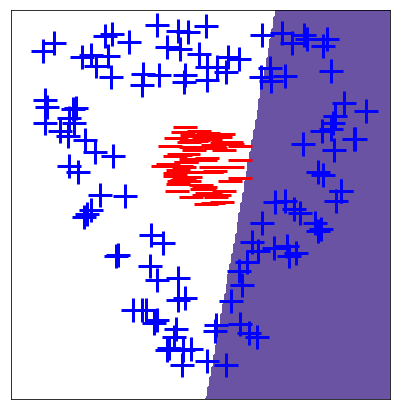

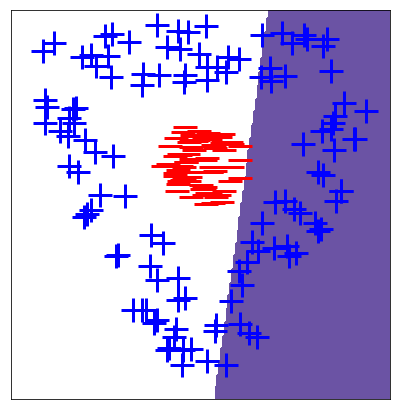

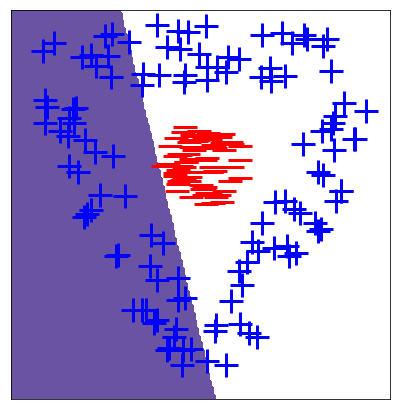

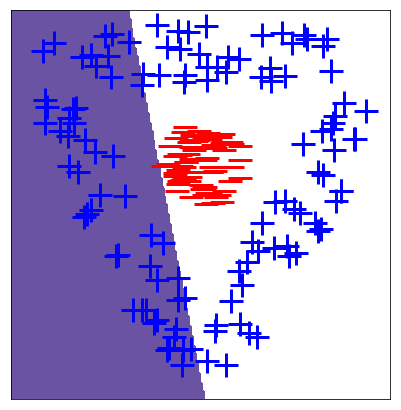

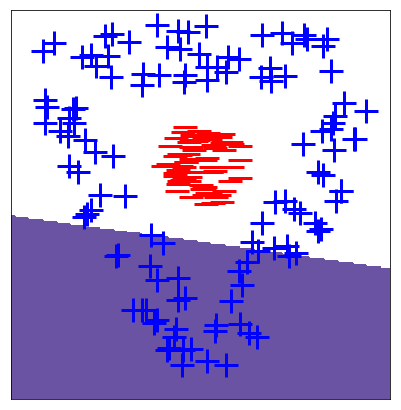

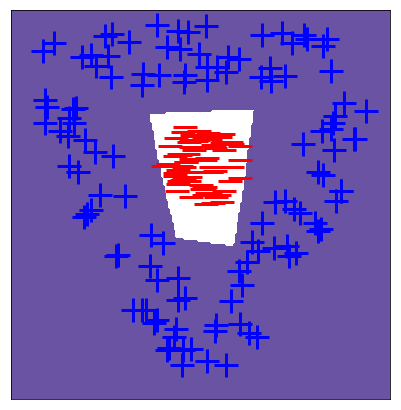

In [24]:
pth_fbf=os.path.join(FBF,descrip+'_LinAtom')
atoms=[]
gX0,gX1=gX[:,:,0],gX[:,:,1]
for ii in range(len(Gamma)):
    # ii=3
    gamma,beta=Gamma[ii],Beta[ii]
    lin_pred=np.squeeze(beta+np.dot(gX,gamma))
    fig,ax=plt.subplots(figsize=(6,6))
    
    # cmap = plt.cm.get_cmap("Blues")
    # cmap = plt.cm.get_cmap("binary")
    #cmap = plt.cm.get_cmap("Oranges")
    cmap = plt.cm.get_cmap("Purples")
    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
    plt.tight_layout()
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')
    #ax.axis('off')
    #ctf=ax.contourf(gX0,gX1,(lin_pred>0).astype('float'),levels=[-0.01,0,1.01],colors=['w','b'])
    #ctf=ax.contourf(gX0,gX1,(lin_pred>0).astype('float'),levels=[-0.01,0,1.01],cmap="binary")
    ctf=ax.contourf(gX0,gX1,(lin_pred>0).astype('float'),levels=[-0.01,0,1.01],colors=['w',cmap(190)])
    #ctf=ax.contourf(gX0,gX1,(lin_pred>0).astype('float'),levels=[-0.01,0,1.01],colors=[my_cmap[0],my_cmap[250]])

    atoms.append(lin_pred)
    ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
    ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')
    
    plt.savefig(pth_fbf+str(ii)+'.pdf')
    plt.savefig(pth_fbf+str(ii)+'.png')
fig,ax=plt.subplots(figsize=(6,6))
plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')
net_pred=np.logical_or.reduce([lp>=0 for lp in atoms])
ctf=ax.contourf(gX0,gX1,(net_pred>0).astype('float'),levels=[-0.01,0,1.01],colors=['w',cmap(190)])
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')
plt.savefig(pth_fbf+'netpred'+'.pdf')
plt.savefig(pth_fbf+'netpred'+'.png')

In [21]:
net_pred=np.logical_or.reduce([lp>=0 for lp in atoms])

In [22]:
net_pred.shape

(200, 209)

In [16]:
pth_fbf+str(ii)+'.pdf'

'./logs/Pub_Model_0504_234152_D2A3/FigBool/D2A3_LinAtom5.pdf'

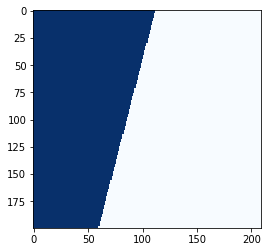

In [167]:
plt.imshow((lin_pred>0).astype('float'),cmap="Blues")

In [220]:
Gamma

array([[[ -1.00221054],
        [ 24.81131468]],

       [[ 41.1123811 ],
        [ -7.8406424 ]],

       [[ 47.98783267],
        [ -7.13811601]],

       [[-47.02719083],
        [-12.27856916]],

       [[-53.56468502],
        [-11.27639326]],

       [[ -5.13981228],
        [-39.59591387]]])

In [166]:
plt.imshow?

### GenBound Figures

In [413]:
#Run things in calc_bounds.py and calc_accuracy.py first

#[arch#-1][data#-1]
# log_dir=Pub_Model_Dirs[0][0]
# log_dir=Pub_Model_Dirs[0][1]
# log_dir=Pub_Model_Dirs[0][2]

# log_dir=Pub_Model_Dirs[1][0]
# log_dir=Pub_Model_Dirs[1][1]
# log_dir=Pub_Model_Dirs[1][2]

# log_dir=Pub_Model_Dirs[2][0]
# log_dir=Pub_Model_Dirs[2][1]
log_dir=Pub_Model_Dirs[2][2]

descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
record_dir=os.path.join(log_dir,'records')
bounds_dir=os.path.join(log_dir,'bounds')

pth_final_bound=os.path.join(bounds_dir,'aftertrain_bounds.txt')
pth_time_bound=os.path.join(bounds_dir,'duringtrain_bounds.txt')

df_final_bound=pd.read_csv(pth_final_bound)
df_time_bound=pd.read_csv(pth_time_bound)
#plt.savefig(bounds_dir+'/BoundComparison.pdf')
steps=df_time_bound['step']
df_time_bound=df_time_bound.set_index('step')
final_bound=df_final_bound.to_dict('records')[0]

df_err=pd.read_csv(os.path.join(record_dir,'error.txt'))
#df_err=df_err.set_index('step')
#df_err.plot(logy=True)

#Bound_Keys=['BM2002','NS2015','BT2017','NS2017','OurBound']
Bound_Keys=['NS2015','BT2017','NS2017','OurBound']
Bound_Names=['Frobenius','spec-$l_{1,2}$','spec-fro','$\Gamma^{Bool}$(ours)']

df_time_bound=df_time_bound[Bound_Keys]
df_bound=pd.DataFrame(data={n:df_time_bound[k] for n,k in zip(Bound_Names,Bound_Keys)})

print df_final_bound

using log_dir: ./logs/Pub_Model_0504_234319_D3A3  descrip: D3A3 id str: 504234319
          ArchVC     D      JerrumVC      K      S  \
0  709558.168831  10.0  21397.129998  484.0  20736   

                             r_Layers  
0  [ 3  4  6  6  7  7  9 11 10 11  1]  


D3A3


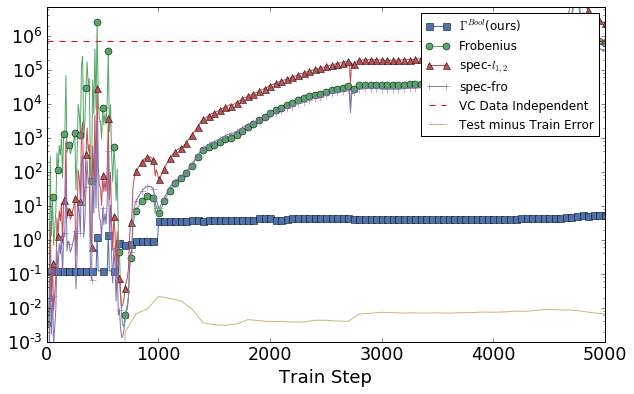

In [414]:
#TODO: add in test and train error
##Oh!! overall VC needs to be sqrt(VCIndep/m)
#Don't include BM2002 bound
#More Data? (intermediate arch sizes)
#error bars (multiple runs)

# colors=['b','r','y','g','m','k']
markers=['s','o','^','+','>','d']

##vc compute
# LogTerms=np.log2(16)+np.log2(np.e)+np.log2(max(U+1,2*d*U))+U*np.log2(1 + p)
# Thm8_Upper=2*W*LogTerms

#ii=2
fig,ax=plt.subplots(figsize=(10,6))
for ii, co in enumerate(df_bound.columns):
    df_bound[co].plot(ax=ax,use_index=True,logy=True,label=co,
                     linestyle='-',marker=markers[ii],markevery=5,markersize=7,
#                       color=colors[ii],
#                       xlim=None,
#                       xlim=[0,3000],
                      xlim=[0,5000],
                     )

    ###Train/test error
    
VC_Name='VC Data Independent'
ax.plot(steps,final_bound['ArchVC']*np.ones_like(steps),'r--',label=VC_Name)    

ax.plot(df_err['step'],df_err['tst_err']-df_err['trn_err'], label='Test minus Train Error')


cur_ylim = ax.get_ylim(); ax.set_ylim([1e-3,final_bound['ArchVC']*10.])
# cur_ylim = ax.get_ylim(); ax.set_ylim([1e-3,cur_ylim[1]])
plt.xlabel('Train Step',fontsize=18)
tickfont=17.5
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.style.use('seaborn-deep')
#plt.style.use('classic')

# plt.title(descrip)
print descrip

plt.legend()
plt.savefig(bounds_dir+'/FigBounds_'+descrip+'.pdf',bbox_inches='tight')
plt.savefig(figure_folder+'/FigGen/FigBounds_'+descrip+'.pdf',bbox_inches='tight')

#### Gen vs Depth

In [ ]:
##Interpolating architectures
#log_dir='./logs/Parm_Model_0509_230036_D3A11'
#log_dir='./logs/Parm_Model_0509_230931_D3A12'
#log_dir='./logs/Parm_Model_0509_231404_D3A21'
#log_dir='./logs/Parm_Model_0509_231857_D3A22'


In [448]:
#Inc_Param_Dirs=[arch[2] for arch in Pub_Model_Dirs]
Inc_Param_Dirs=[
Pub_Model_Dirs[0][2],
'./logs/Parm_Model_0509_230036_D3A11',
'./logs/Parm_Model_0509_230931_D3A12',
Pub_Model_Dirs[1][2],
'./logs/Parm_Model_0509_231404_D3A21',
'./logs/Parm_Model_0509_231857_D3A22',

Pub_Model_Dirs[2][2],
]
    

df_depth=pd.DataFrame()
for log_dir in Inc_Param_Dirs:
    descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
#     print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
    record_dir=os.path.join(log_dir,'records')
    bounds_dir=os.path.join(log_dir,'bounds')
    all_weights=load_weights(log_dir)
    all_step=np.load(get_path('step','wwatch',log_dir))#every 10 of 10000 iter
    arch=[b.shape[-1] for w,b in all_weights[:-1]]#net architecture
    n_params=param_counter(arch)

    pth_final_bound=os.path.join(bounds_dir,'aftertrain_bounds.txt')
    pth_time_bound=os.path.join(bounds_dir,'duringtrain_bounds.txt')

    df_final_bound=pd.read_csv(pth_final_bound)
    df_time_bound=pd.read_csv(pth_time_bound)
    steps=df_time_bound['step']
    df_time_bound=df_time_bound.set_index('step')
    final_bound=df_final_bound.to_dict('records')[0]
#     df_err=pd.read_csv(os.path.join(record_dir,'error.txt'))
#     Bound_Keys=['NS2015','BT2017','NS2017','OurBound']
#     Bound_Names=['Frobenius','spec-$l_{1,2}$','spec-fro','$\Gamma^{Bool}$(ours)']
    df_time_bound=df_time_bound[Bound_Keys]
    df_bound=pd.DataFrame(data={n:df_time_bound[k] for n,k in zip(Bound_Names,Bound_Keys)})

    print df_final_bound
    
    last_info=df_bound[Bound_Names].iloc[-1]
    last_info['num_params']=n_params
    last_info[VC_Name]=final_bound['ArchVC']
    
    df_depth=df_depth.append(last_info,ignore_index=True)

df_depth=df_depth.set_index('num_params')
print df_depth

        ArchVC    D     JerrumVC     K     S     r_Layers
0  8376.376242  4.0  1863.240507  55.0  1444  [3 4 6 5 1]
         ArchVC    D     JerrumVC     K    S       r_Layers
0  22140.341993  5.0  2376.062128  73.0  729  [3 4 6 6 3 1]
         ArchVC    D     JerrumVC     K    S         r_Layers
0  50058.640028  5.0  3263.155855  99.0  841  [3 4 4 8 7 1 1]
         ArchVC    D    JerrumVC     K    S           r_Layers
0  101110.26654  4.0  806.681704  27.0  361  [3 4 4 2 1 1 1 1]
          ArchVC    D     JerrumVC     K    S             r_Layers
0  187502.378018  4.0  1202.979241  37.0  900  [3 4 5 3 1 1 1 1 1]
          ArchVC    D     JerrumVC     K    S               r_Layers
0  343212.068084  4.0  1202.979241  37.0  900  [3 4 5 3 1 1 1 1 1 1]
          ArchVC     D      JerrumVC      K      S  \
0  709558.168831  10.0  21397.129998  484.0  20736   

                             r_Layers  
0  [ 3  4  6  6  7  7  9 11 10 11  1]  
            $\Gamma^{Bool}$(ours)      Frobenius  VC 

D3A3


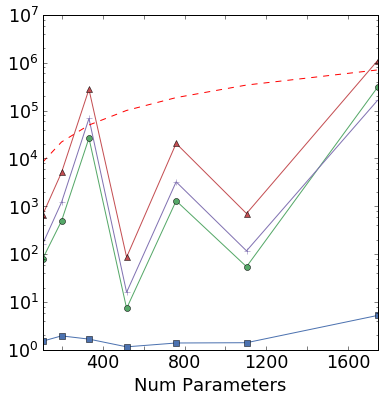

In [449]:
markers=['s','o','^','+','>','d']
fig,ax=plt.subplots(figsize=(6,6))
for ii, co in enumerate(df_bound.columns):#Keeps order consistent w/prev
    df_depth[co].plot(ax=ax,logy=True,label=co,
                     linestyle='-',marker=markers[ii],
#                        logx=True,
#                       markevery=5,markersize=7,
#                       color=colors[ii],
#                       xlim=None,
#                       xlim=[0,3000],
#                       xlim=[0,5000],
                     )
df_depth[VC_Name].plot(ax=ax,logy=True,label=VC_Name,
                       linestyle='--',color='r',
#                        logx=True,
#                      linestyle='-',
#                        marker=markers[ii+1],
                      )



# cur_ylim = ax.get_ylim(); ax.set_ylim([1e-3,final_bound['ArchVC']*10.])
# cur_ylim = ax.get_ylim(); ax.set_ylim([1e-3,cur_ylim[1]])

plt.xlabel('Num Parameters',fontsize=18)
tickfont=17.5
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)
#ax.set_yticklabels([])#could remove one day

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.style.use('seaborn-deep')

print descrip

# plt.legend()
plt.savefig(figure_folder+'/FigGen/GenvsParamD3.pdf',bbox_inches='tight')

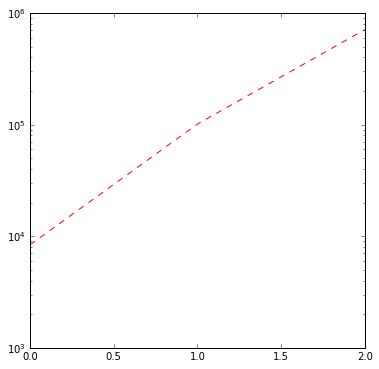

In [429]:
fig,ax=plt.subplots(figsize=(6,6))
df_depth[VC_Name].plot(ax=ax,x='num_params',logy=True,label=VC_Name,use_index=False,
                       linestyle='--',color='r',
#                      linestyle='-',
#                        marker=markers[ii+1],
                      )


In [425]:
dfv=df_depth[VC_Name]

In [426]:
dfv.plot?

In [424]:
df_depth['num_params']

0     107.0
1     517.0
2    1743.0
Name: num_params, dtype: float64

In [396]:
Bound_Names

['Frobenius', 'spec-$l_{1,2}$', 'spec-fro', '$\\Gamma^{Bool}$(ours)']

In [ ]:
step=all_step[iter_slice]
step_weights=[[w[iter_slice],b[iter_slice]] for w,b in all_weights]
step_dweights=[[w[iter_slice],b[iter_slice]] for w,b in del_weights]
arch=[b.shape[-1] for w,b in step_weights[:-1]]#net architecture


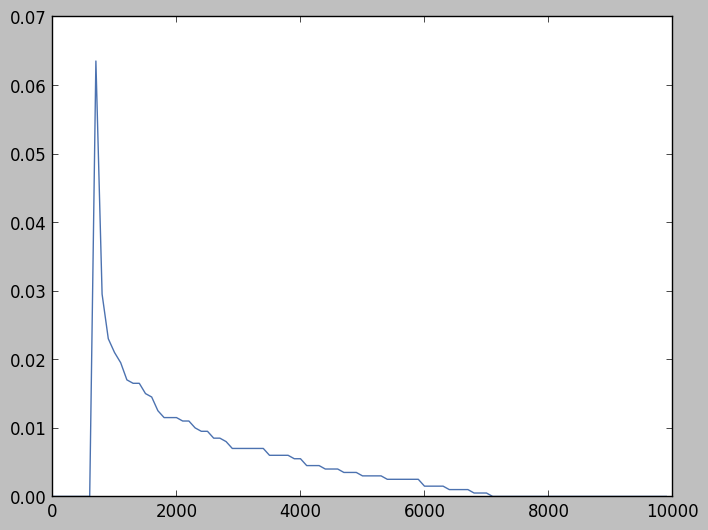

In [312]:
plt.plot(df_err['step'],df_err['tst_err']-df_err['trn_err'])

In [315]:
df_err['tst_err']-df_err['trn_err']

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5     0.0000
6     0.0000
7     0.0635
8     0.0295
9     0.0230
10    0.0210
11    0.0195
12    0.0170
13    0.0165
14    0.0165
15    0.0150
16    0.0145
17    0.0125
18    0.0115
19    0.0115
20    0.0115
21    0.0110
22    0.0110
23    0.0100
24    0.0095
25    0.0095
26    0.0085
27    0.0085
28    0.0080
29    0.0070
       ...  
70    0.0005
71    0.0000
72    0.0000
73    0.0000
74    0.0000
75    0.0000
76    0.0000
77    0.0000
78    0.0000
79    0.0000
80    0.0000
81    0.0000
82    0.0000
83    0.0000
84    0.0000
85    0.0000
86    0.0000
87    0.0000
88    0.0000
89    0.0000
90    0.0000
91    0.0000
92    0.0000
93    0.0000
94    0.0000
95    0.0000
96    0.0000
97    0.0000
98    0.0000
99    0.0000
dtype: float64

In [258]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [237]:
len(df_bound)

1000

In [ ]:
# df_tvd[col].plot(ax=ax,use_index=True,yerr=df_sem[col],capsize=5,
#                  capthick=3,elinewidth=1,errorevery=100,
#                  figsize=(6,4),linestyle='-',marker=markers[i],
#                  markevery=50,markersize=7)#From CausalGan code

# colors=['b','r','y','g','m','k']
# markers=['s','o','^','+','>','d']
# plt.style.use('seaborn-deep')
#df_tvd=df_tvd.rolling(window=5,min_periods=1,center=True).mean()#MoveAve

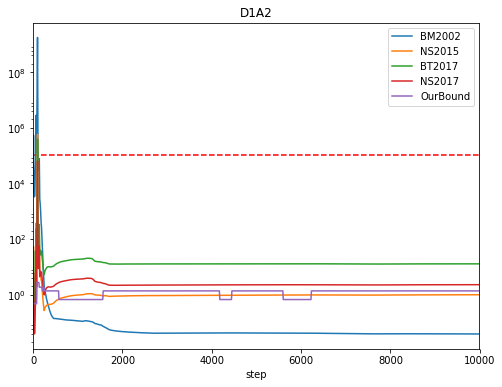

In [55]:
fig,ax=plt.subplots()
ax.plot(steps,final_bound['ArchVC']*np.ones_like(steps),'r--')#VC line
#df_time_bound.plot(ax=ax,xlim=[0,500],logy=True,figsize=(8,6))
df_time_bound.plot(ax=ax,logy=True,figsize=(8,6))
plt.title(descrip)
plt.savefig(bounds_dir+'/BoundsComparison_'+descrip+'.pdf')

In [57]:
len(steps)

1000

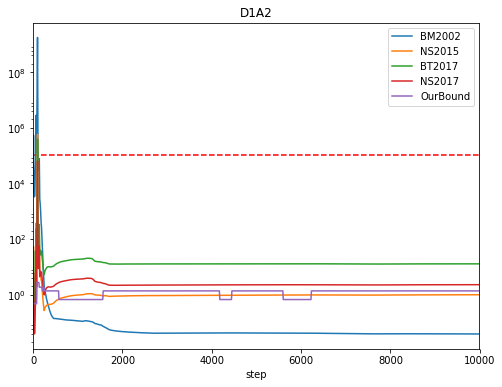

In [55]:
fig,ax=plt.subplots()
ax.plot(steps,final_bound['ArchVC']*np.ones_like(steps),'r--')#VC line
#df_time_bound.plot(ax=ax,xlim=[0,500],logy=True,figsize=(8,6))
df_time_bound.plot(ax=ax,logy=True,figsize=(8,6))
plt.title(descrip)
plt.savefig(bounds_dir+'/BoundsComparison_'+descrip+'.pdf')

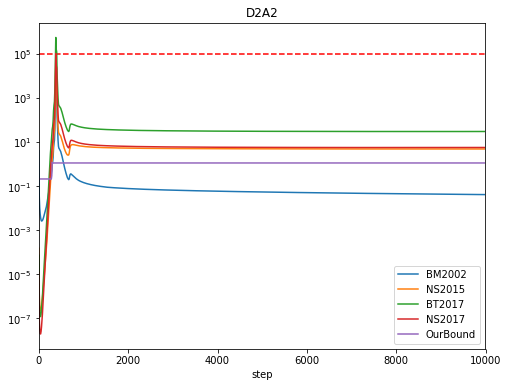

In [52]:
fig,ax=plt.subplots()
ax.plot(steps,final_bound['ArchVC']*np.ones_like(steps),'r--')#VC line
#df_time_bound.plot(ax=ax,xlim=[0,500],logy=True,figsize=(8,6))
df_time_bound.plot(ax=ax,logy=True,figsize=(8,6))
plt.title(descrip)
plt.savefig(bounds_dir+'/BoundsComparison_'+descrip+'.pdf')

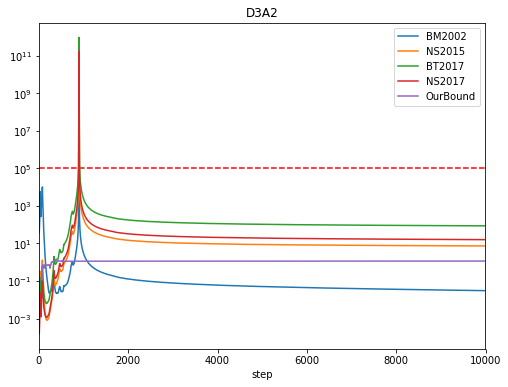

In [49]:
fig,ax=plt.subplots()
ax.plot(steps,final_bound['ArchVC']*np.ones_like(steps),'r--')#VC line
#df_time_bound.plot(ax=ax,xlim=[0,500],logy=True,figsize=(8,6))
df_time_bound.plot(ax=ax,logy=True,figsize=(8,6))
plt.title(descrip)
plt.savefig(bounds_dir+'/BoundsComparison_'+descrip+'.pdf')

{'ArchVC': {0: 8376.376241836786},
 'D': {0: 1.0},
 'JerrumVC': {0: 17.770780163555855},
 'K': {0: 2.0},
 'S': {0: 1},
 'r_Layers': {0: '[3 1 1 1 1]'}}

In [97]:
#Get Final Bounds Together

df_Final=pd.DataFrame()
for Arch in Pub_Model_Dirs:
    for log_dir in Arch:
        
        descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
        print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
        record_dir=os.path.join(log_dir,'records')
        bounds_dir=os.path.join(log_dir,'bounds')

        pth_final_bound=os.path.join(bounds_dir,'aftertrain_bounds.txt')
        pth_time_bound=os.path.join(bounds_dir,'duringtrain_bounds.txt')
        df_final_bound=pd.read_csv(pth_final_bound)
        df_time_bound=pd.read_csv(pth_time_bound)
        #df_time_bound=df_time_bound.set_index('step')
        final_bound=df_final_bound.to_dict('records')[0]

        Bound_Keys=['BM2002','NS2015','BT2017','NS2017','OurBound']
        df_time_bound=df_time_bound[Bound_Keys]
        
        di_last_time_bound=df_time_bound.iloc[-1].to_dict()
        #print di_last_time_bound
        final_bound.update(di_last_time_bound)
        if len(df_Final.columns)==0:
            df_Final=pd.DataFrame(columns=final_bound.keys())
        df_Final.loc[descrip]=final_bound
df_Final.to_csv(figure_folder+'/Table of Bounds')

using log_dir: ./logs/Pub_Model_0504_234437_D1A1  descrip: D1A1 id str: 504234437
using log_dir: ./logs/Pub_Model_0504_234557_D2A1  descrip: D2A1 id str: 504234557
using log_dir: ./logs/Pub_Model_0504_234822_D3A1  descrip: D3A1 id str: 504234822
using log_dir: ./logs/Pub_Model_0504_235012_D1A2  descrip: D1A2 id str: 504235012
using log_dir: ./logs/Pub_Model_0504_235058_D2A2  descrip: D2A2 id str: 504235058
using log_dir: ./logs/Pub_Model_0504_235237_D3A2  descrip: D3A2 id str: 504235237
using log_dir: ./logs/Pub_Model_0504_233305_D1A3  descrip: D1A3 id str: 504233305
using log_dir: ./logs/Pub_Model_0504_234152_D2A3  descrip: D2A3 id str: 504234152
using log_dir: ./logs/Pub_Model_0504_234319_D3A3  descrip: D3A3 id str: 504234319


In [98]:
df_Final

D      K                            r_Layers         NS2017        S  \
D1A1   1.0    2.0                         [3 1 1 1 1]       0.837440      1.0   
D2A1   3.0   15.0                         [3 4 2 1 1]       1.153127    100.0   
D3A1   4.0   55.0                         [3 4 6 5 1]     163.900218   1444.0   
D1A2   2.0    5.0                   [3 2 1 1 1 1 1 1]       2.278992      4.0   
D2A2   2.0   11.0                   [3 4 1 1 1 1 1 1]       5.660528     64.0   
D3A2   4.0   27.0                   [3 4 4 2 1 1 1 1]      15.911107    361.0   
D1A3   2.0    5.0             [3 2 1 1 1 1 1 1 1 1 1]      15.273499      4.0   
D2A3   3.0   15.0             [3 4 2 1 1 1 1 1 1 1 1]      37.692847     36.0   
D3A3  10.0  484.0  [ 3  4  6  6  7  7  9 11 10 11  1]  163851.514445  20736.0   

             NS2015      JerrumVC     BM2002  OurBound        BT2017  \
D1A1       0.247484     17.770780   0.011760  0.666535  3.145366e+00   
D2A1       0.444112    380.145412   0.011799  1.378669  3.547138e+00   
D3A1      80.241695   1863.240507   0.180840  1.517090  6.670487e+02   
D1A2       0.990446     74.426950   0.038490  1.364065  1.280234e+01   
D2A2       4.841475    251.739291   0.041229  1.121916  3.010856e+01   
D3A2       7.340250    806.681704   0.030512  1.153442  8.634999e+01   
D1A3      13.911440     74.426950   0.514365  1.364065  1.293519e+02   
D2A3       9.397951    335.927476   0.259092  1.296008  2.622992e+02   
D3A3  306981.201440  21397.129998  35.265697  5.223419  1.107960e+06   

             ArchVC  
D1A1    8376.376242  
D2A1    8376.376242  
D3A1    8376.376242  
D1A2  101110.266540  
D2A2  101110.266540  
D3A2  101110.266540  
D1A3  709558.168831  
D2A3  709558.168831  
D3A3  709558.168831

In [102]:
df_Final.loc[['D2A1','D2A2','D3A1','D3A2']]

D     K           r_Layers      NS2017       S     NS2015  \
D2A1  3.0  15.0        [3 4 2 1 1]    1.153127   100.0   0.444112   
D2A2  2.0  11.0  [3 4 1 1 1 1 1 1]    5.660528    64.0   4.841475   
D3A1  4.0  55.0        [3 4 6 5 1]  163.900218  1444.0  80.241695   
D3A2  4.0  27.0  [3 4 4 2 1 1 1 1]   15.911107   361.0   7.340250   

         JerrumVC    BM2002  OurBound      BT2017         ArchVC  
D2A1   380.145412  0.011799  1.378669    3.547138    8376.376242  
D2A2   251.739291  0.041229  1.121916   30.108560  101110.266540  
D3A1  1863.240507  0.180840  1.517090  667.048730    8376.376242  
D3A2   806.681704  0.030512  1.153442   86.349994  101110.266540

In [100]:
df_FinalB=df_Final[Bound_Keys]

In [101]:
df_FinalB.loc['D1A1']

BM2002      0.011760
NS2015      0.247484
BT2017      3.145366
NS2017      0.837440
OurBound    0.666535
Name: D1A1, dtype: float64

In [114]:
##Load All

all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))#every 10 of 10000 iter

###Define Slicing###
dt=10 #every 100
iter_slice=np.arange(len(all_step))
#iter_slice=np.linspace(0,100,2).astype('int')
iter_slice=iter_slice[::dt]
#iter_slice=iter_slice[-1:]#just last entry
dt_weights=[[w[iter_slice],b[iter_slice]] for w,b in all_weights]
#dt_weights=[[w[::dt],b[::dt]] for w,b in all_weights]
del_weights=get_del_weights(dt_weights)
#step=all_step[::dt]
step=all_step[iter_slice]

arch=[b.shape[-1] for w,b in dt_weights[:-1]]#net architecture
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
#HighResX=resample_grid(gridX,5000)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [ ]:
plt.figure()
#plt.plot(step,Jerrum1995, label='VC Dimension')
plt.plot(step,OurBound,label='Our Bound (VC based)')
plt.plot(step,BM2002,label='BM2002')
plt.plot(step,NS2015,label='NS2015')
plt.plot(step,BT2017,label='BT2017')
plt.plot(step,NS2017,label='NS2017')
plt.xlabel('Training Iteration')

plt.legend()
plt.savefig(bounds_dir+'/BoundComparison.pdf')
#plt.savefig(bounds_dir+'/BoundComparison.png')


In [4]:
df_time_bound.head()

BM2002      BT2017    D    JerrumVC     K     NS2015     NS2017  \
0     66.090728    0.133318  1.0    8.885390   1.0   0.031220   0.034413   
1  63922.754525  190.174150  3.0  280.774411  14.0  43.400406  48.953710   
2  10858.724582   53.249359  2.0   74.426950   5.0  11.357258  13.823974   
3  28272.158408  234.998227  2.0   74.426950   5.0  43.687709  61.675004   
4   1531.265040   22.268683  2.0   74.426950   5.0   3.531042   5.839710   

   OurBound     S  step  
0  0.471312   1.0     1  
1  2.649408  16.0    11  
2  1.364065   4.0    21  
3  1.364065   4.0    31  
4  1.364065   4.0    41

In [303]:
##Just brief exploration
# #PMD_dataiii=[Pub_Model_Dirs[0][2],Pub_Model_Dirs[1][2],Pub_Model_Dirs[2][2]]
# PMD_dataiii=[Pub_Model_Dirs[2][0],Pub_Model_Dirs[2][1],Pub_Model_Dirs[2][2]]
# for ld in PMD_dataiii:
#     ds,ist=ld.split('_')[-1],str(file2number(ld))
#     print 'using log_dir:',ds
#     record_dir=os.path.join(ld,'records')
#     bounds_dir=os.path.join(ld,'bounds')
#     pth_final_bound=os.path.join(bounds_dir,'aftertrain_bounds.txt')
#     df_final_bound=pd.read_csv(pth_final_bound)
#     final_bound=df_final_bound.to_dict('records')[0]
#     npX=np.load(os.path.join(record_dir,'dataX.npy'))
# #     npY=np.load(os.path.join(record_dir,'dataY.npy'))
#     print '  K:',final_bound['K'], 'm:',len(npX)

## MNIST Figure (Interpret)

In [728]:
Images.shape

(55000, 28, 28)

In [13]:
#Same for each log_dir
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
mnist_datasets=mnist_data.read_data_sets('./data/mnist/',reshape=False,validation_size=5000)
Images=mnist_datasets.train.images
Images=np.squeeze(Images)
Labels=mnist_datasets.train.labels
fl_inputs=[Images[Labels==i].reshape([-1,784]) for i in range(10)]

val_Images=np.squeeze(mnist_datasets.validation.images)
val_Labels=mnist_datasets.validation.labels
#fl_val_inputs=[val_Images[val_Labels==i].reshape([-1,784]) for i in range(10)]

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


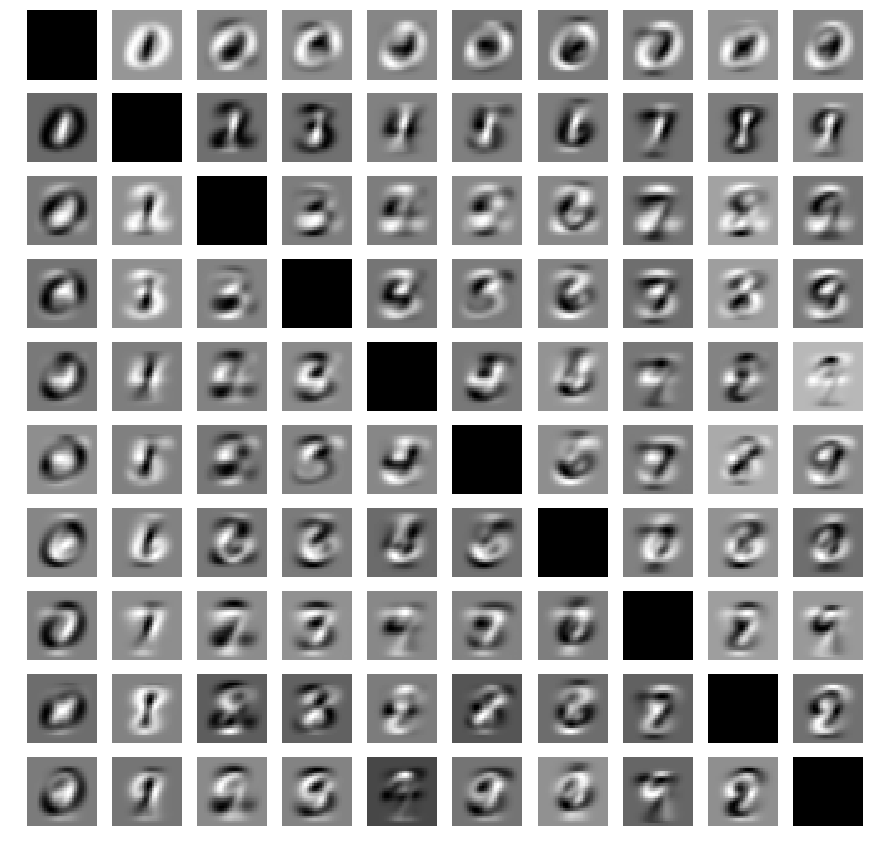

In [11]:
Ims=[np.mean(Images[Labels==i],axis=0) for i in range(10)]
fig, axes = plt.subplots(10,10, figsize=(15,15))
for i, ax1d in enumerate(axes):
    for j,ax in enumerate(ax1d):
        ax.imshow(Ims[i]-Ims[j], cmap='gray',interpolation='none')
        ax.axis('off')

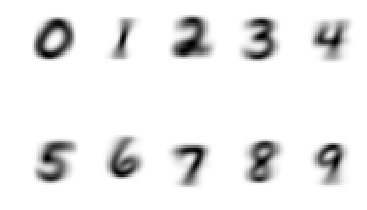

In [569]:
Ims=[np.mean(Images[Labels==i],axis=0) for i in range(10)]
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    ax.imshow(Ims[i], cmap='gray',interpolation='none')
    ax.axis('off')

## MNIST Figure (Interpret)

In [2]:
# log_dir='./logs/Model_0513_092517_MnistPCA3m20k_A2Iter5k';labs=[[5,6],[8,9]]#23139 total #Stale

# log_dir='./logs/Model_0513_120107_MnistPCA3A2_labs01.67';labs=[[0,1],[6,7]] #99%acc
# bool_tree='(a0 & a4 & a5 & a6) | (a1 & a11 & a3 & a9) | (a10 & a2 & a7 & a8)'

#log_dir='./logs/debugValidation_0513_160116_MnistPCA3A2_labsAll';labs=[[0,1,2,3,4],[5,6,7,8,9]]
    # (a1 | a28 | a3 | a43 | a8) & (a10 | a11 | a16 | a23 | a32) & (a14 | a19 |
    # a22 | a33 | a38) & (a2 | a30 | a31 | a34 | a7) & (a12 | a13 | a18 | a24 |
    # a39 | a40 | a5 | a9)& (a0 | a15 | a17 | a20 | a21 | a25 | a26 | a27 | a29
    # | a35 | a36 | a37 | a4 | a41 | a42 | a6)

#log_dir='./logs/Model_0513_161151_Mnist20kA2PCA4_LabsAll';labs=[[0,1,2,3,4],[5,6,7,8,9]]
#file:///home/chris/Projects/descartes/logs/Model_0513_161151_Mnist20kA2PCA4_LabsAll/records/booltree.png

log_dir='./logs/Model_0513_162218_Mnist55kA2PCA4_LabsAll';labs=[[0,1,2,3,4],[5,6,7,8,9]]#bigboy

In [44]:
descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
record_dir=os.path.join(log_dir,'records')
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
lab_neg,lab_pos=labs


logic_dir=os.path.join(log_dir,'logic')
with open( logic_dir+'/ValBool.pkl','rb') as f:
    ValBool=pickle.load(f)
with open( logic_dir+'/sympy_abstract_Bool_Tree.pkl','rb') as f:
    abstract_Bool_Tree=pickle.load(f)
    abt=abstract_Bool_Tree
with open( logic_dir+'/sympy_Bool_Tree.pkl','rb') as f:
    Bool_Tree=pickle.load( f)
    BT=Bool_Tree
with open( logic_dir+'/terminal_leafs.pkl','rb') as f:
    terminal_leafs=pickle.load(f)
with open( logic_dir+'/leaf_substitute_symbols.pkl','rb') as f:
    subdict=pickle.load(f)
with open (logic_dir+'/essential.pkl','rb') as f:
    essential=pickle.load(f)

using log_dir: ./logs/Model_0513_162218_Mnist55kA2PCA4_LabsAll  descrip: LabsAll id str: 513162218


In [6]:
PeOT=list(preorder_traversal(abstract_Bool_Tree))

In [7]:
PeOT[:3]

[(a102 | a108 | a111 | a112 | a115 | a116 | a122 | a14 | a140 | a173 | a175 | a26 | a3 | a37 | a44 | a46 | a51 | a53 | a55 | a60 | a68 | a7 | a77 | a82 | a87 | a92 | a94 | (a119 & a18) | (a167 & a36)) & (a0 | a1 | a127 | a128 | a13 | a130 | a131 | a152 | a155 | a158 | a159 | a16 | a164 | a17 | a171 | a19 | a21 | a27 | a32 | a4 | a61 | a64 | a65 | a66 | a73 | a75 | a86 | a89 | a97 | a98 | (a117 & a154 & a56 & a8) | (a121 & a161 & a69 & a70)) & (a110 | a113 | a118 | a120 | a135 | a142 | a150 | a160 | a163 | a172 | a23 | a24 | a25 | a28 | a29 | a35 | a39 | a40 | a41 | a58 | a63 | a67 | a71 | a76 | a78 | a84 | a85 | a90 | a91 | a93 | (a109 & a157 & a174 & a88) | (a143 & a147 & a34 & a80)) & (((a10 | a103 | a129 | a134 | a162 | a169 | a2 | a20 | a30 | a52 | a6 | a62 | a74 | a79) & (a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95)) | ((a100 | a136 | a139 | a141 | a149 | a15 | a153 | a31 | a43 | a47 | a72 | a81 | a9 | (a101 & a99) | (a124 & a48)) & (a1

And


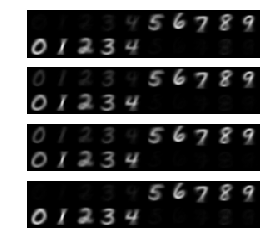

In [42]:
#val_Images=np.squeeze(mnist_datasets.validation.images)
#val_Labels=mnist_datasets.validation.labels
ROOT=PeOT[0]
E=[essential[a] for a in ROOT.args]
L1=len(ROOT.args)
fig,axes=plt.subplots(L1,1)
print ROOT.func
Compost=[]
for ll,expr in enumerate(ROOT.args):
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')



a110 | a113 | a118 | a120 | a135 | a142 | a150 | a160 | a163 | a172 | a23 | a24 | a25 | a28 | a29 | a35 | a39 | a40 | a41 | a58 | a63 | a67 | a71 | a76 | a78 | a84 | a85 | a90 | a91 | a93 | (a109 & a157 & a174 & a88) | (a143 & a147 & a34 & a80)
Or
[a135, a142, a160, a163, a28, a29, a39, a63, a78, a90]
10 32


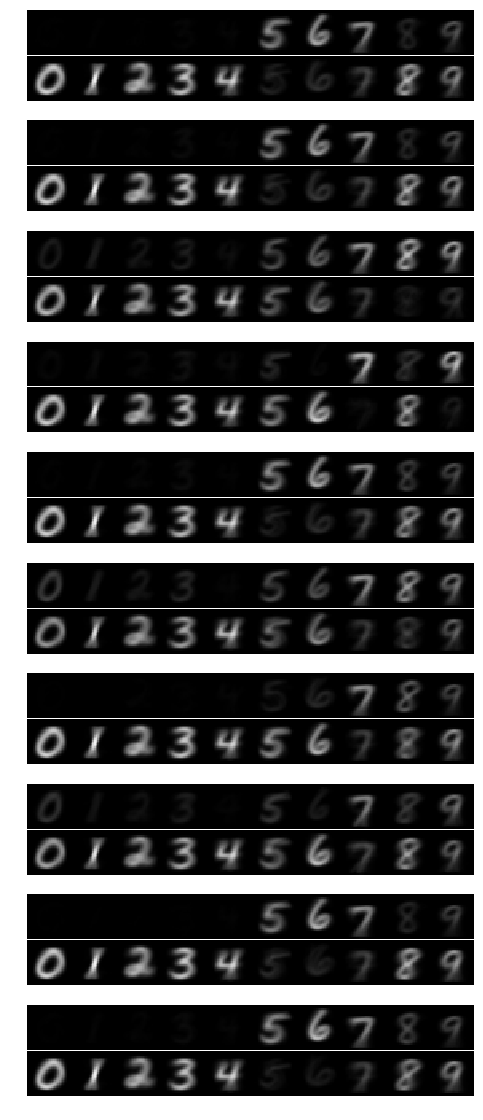

In [52]:
ra=2
base=ROOT.args[ra]
print base
print base.func
Args=[a for a in base.args if essential[a]]
print Args
print len(Args),len(base.args)
L=len(Args)
fig,axes=plt.subplots(L,1,figsize=(8,L*2))
Compost=[]
for ll,expr in enumerate(Args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')

plt.savefig(logic_dir+'/R'+str(ra)+'args.pdf')
plt.savefig(logic_dir+'/R'+str(ra)+'args.png')


((a10 | a103 | a129 | a134 | a162 | a169 | a2 | a20 | a30 | a52 | a6 | a62 | a74 | a79) & (a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95)) | ((a100 | a136 | a139 | a141 | a149 | a15 | a153 | a31 | a43 | a47 | a72 | a81 | a9 | (a101 & a99) | (a124 & a48)) & (a105 | a114 | a12 | a132 | a137 | a145 | a146 | a148 | a151 | a165 | a166 | a168 | a22 | a38 | a59 | a96 | (a104 & a138 & a42 & a54) | (a11 & a126 & a33 & a45)))
Or
[(a10 | a103 | a129 | a134 | a162 | a169 | a2 | a20 | a30 | a52 | a6 | a62 | a74 | a79) & (a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95), (a100 | a136 | a139 | a141 | a149 | a15 | a153 | a31 | a43 | a47 | a72 | a81 | a9 | (a101 & a99) | (a124 & a48)) & (a105 | a114 | a12 | a132 | a137 | a145 | a146 | a148 | a151 | a165 | a166 | a168 | a22 | a38 | a59 | a96 | (a104 & a138 & a42 & a54) | (a11 & a126 & a33 & a45))]
2 2


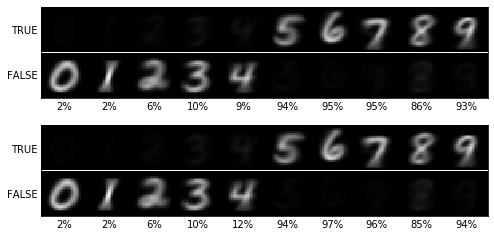

In [109]:
ra=3
base=ROOT.args[ra]
print base
print base.func
Args=[a for a in base.args if essential[a]]
print Args
print len(Args),len(base.args)
L=len(Args)
fig,axes=plt.subplots(L,1,figsize=(8,L*2))
Compost=[]
for ll,expr in enumerate(Args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)

    ax=axes[ll]    
    
    pos_frac=[np.mean(mask[ix]) for ix in ids]
    correct_frac=[1-pf for pf in pos_frac[:5]]+pos_frac[5:]
    pos_frac=[np.mean(mask[ix]) for ix in ids]
    #correct_frac=(100*np.round([1-pf for pf in pos_frac[:5]]+pos_frac[5:],2)).astype('int')
    true_frac=(100*np.round(pos_frac,2)).astype('int')
    pos_list=28*np.arange(10)+14
    name_list=[str(cf)+'%' for cf in true_frac]
    

    ax = fig.add_axes((0.1,0.1,0.8,0.0))
    ax.yaxis.set_visible(False) # hide the yaxis
    
    ax.imshow(composite,cmap='gray')
    ax.set_xticks(pos_list)
    ax.set_xticklabels(name_list)
    ax.set_yticks([14,28+14])
    ax.set_yticklabels(['TRUE','FALSE'])
    ax.tick_params(axis=u'both', which=u'both',length=0)


plt.savefig(logic_dir+'/R'+str(ra)+'args.pdf')
plt.savefig(logic_dir+'/R'+str(ra)+'args.png')


In [93]:
import matplotlib.ticker as ticker

In [89]:
correct_frac

array([0.98, 0.98, 0.94, 0.9 , 0.88, 0.94, 0.97, 0.96, 0.85, 0.94])

In [100]:
ax.yaxis('off')

TypeError: 'YAxis' object is not callable

In [87]:
print np.round(100*correct_frac,2)

[0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9
 0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96
 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98
 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94
 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94
 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9
 0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96
 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98
 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94
 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94
 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9
 0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96
 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98
 0.94 0.9  0.88 0.94 0.97 0.96 0.85 0.94 0.98 0.98 0.94 0.9  0.88 0.94
 0.97 0.9

(a10 | a103 | a129 | a134 | a162 | a169 | a2 | a20 | a30 | a52 | a6 | a62 | a74 | a79) & (a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95)
And
[a10 | a103 | a129 | a134 | a162 | a169 | a2 | a20 | a30 | a52 | a6 | a62 | a74 | a79, a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95]
2 2


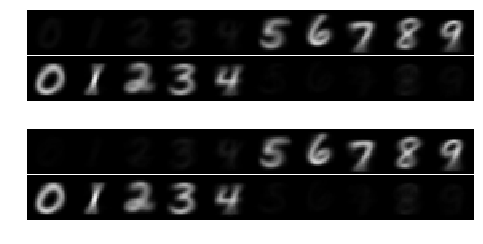

In [68]:
ra3=0
base=ROOT.args[3].args[ra3]
print base
print base.func
Args=[a for a in base.args if essential[a]]
print Args
print len(Args),len(base.args)
L=len(Args)
fig,axes=plt.subplots(L,1,figsize=(8,L*2))
Compost=[]
for ll,expr in enumerate(Args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')

plt.savefig(logic_dir+'/R3.'+str(ra)+'args.pdf')
plt.savefig(logic_dir+'/R3.'+str(ra)+'args.png')


a106 | a107 | a123 | a125 | a133 | a144 | a156 | a170 | a49 | a5 | a50 | a57 | a83 | a95
Or
[a107, a125, a170, a5, a50, a57, a83]
7 14


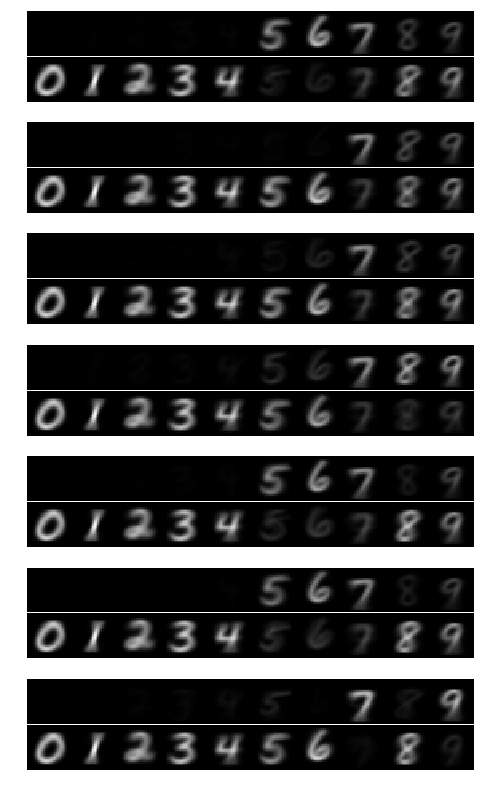

In [70]:
ra30=1
base=ROOT.args[3].args[0].args[ra30]
print base
print base.func
Args=[a for a in base.args if essential[a]]
print Args
print len(Args),len(base.args)
L=len(Args)
fig,axes=plt.subplots(L,1,figsize=(8,L*2))
Compost=[]
for ll,expr in enumerate(Args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')

plt.savefig(logic_dir+'/R3.0.'+str(ra30)+'args.pdf')
plt.savefig(logic_dir+'/R3.0.'+str(ra30)+'args.png')


In [73]:
def show_expr(expr,ax=None):
    if not ax:
        fig,ax=plt.subplots()
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax.imshow(composite,cmap='gray')
    ax.axis('off')

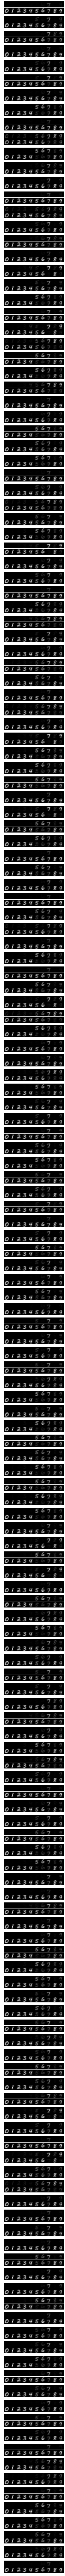

In [77]:
atoms=abstract_Bool_Tree.atoms()
fig,axes=plt.subplots(len(atoms),1, figsize=(8,len(atoms)*2))
for sym,ax in zip(atoms,axes):
    show_expr(sym,ax)
plt.savefig(logic_dir+'/AllAtoms.pdf')

In [79]:
base=Args[2]
print base.func
Args=[a for a in base.args if essential[a]]
print len(Args),len(base.args)
L=len(Args)
fig,axes=plt.subplots(L,1,figsize=(10,L*2))
Compost=[]
for ll,expr in enumerate(Args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')

plt.savefig(logic_dir+'/R2args.pdf')
plt.savefig(logic_dir+'/R2args.png')


IndexError: list index out of range

In [41]:
E

[True, True, True, True]

Or


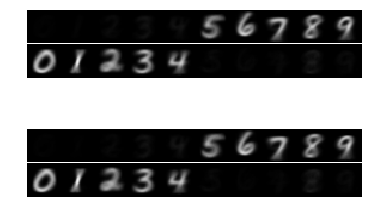

In [28]:
base=ROOT.args[3]
print base.func
L=len(base.args)
fig,axes=plt.subplots(L,1)

Compost=[]
for ll,expr in enumerate(base.args):
#     print expr.func
    ids=[np.where(val_Labels==i)[0] for i in range(10)]
    Bools=ValBool[expr]
    mask=Bools.astype('float')[:,None,None]
    assert(len(mask.shape)==len(val_Images.shape))#else potential memory crash
    pos_msk_imgs=mask*val_Images
    neg_msk_imgs=(1.-mask)*val_Images
    pos_Agg=[np.mean(pos_msk_imgs[ix],axis=0) for ix in ids]
    neg_Agg=[np.mean(neg_msk_imgs[ix],axis=0) for ix in ids]
    composite=np.vstack([np.hstack(pos_Agg),np.ones([1,280]),np.hstack(neg_Agg)])
    Compost.append(composite)
    ax=axes[ll]
    ax.imshow(composite,cmap='gray')
    ax.axis('off')


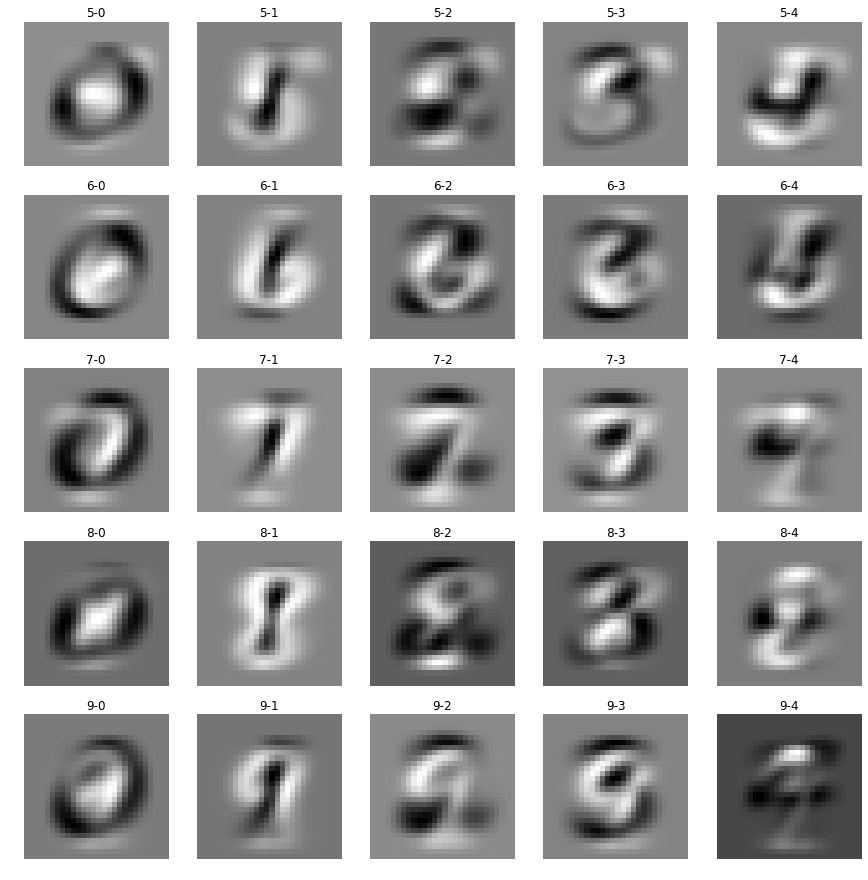

In [712]:
Ims=[np.mean(Images[Labels==i],axis=0) for i in range(10)]
fig, axes = plt.subplots(len(lab_pos),len(lab_neg), figsize=(15,15))

for i, ax1d in enumerate(axes):
    for j,ax in enumerate(ax1d):
        ax.imshow(Ims[lab_pos[i]]-Ims[lab_neg[j]], cmap='gray',interpolation='none')
        ax.axis('off')
        ax.set_title('-'.join([str(lab_pos[i]),str(lab_neg[j])]))

In [713]:
# val_Images=mnist_datasets.validation.images
# val_Labels=mnist_datasets.validation.labels
# fl_val_inputs=[val_Images[val_Labels==i].reshape([-1,784]) for i in range(10)]
# id_neg=
id_neg=np.where(np.logical_or.reduce([Labels==ln for ln in lab_neg]))[0]
id_pos=np.where(np.logical_or.reduce([Labels==ln for ln in lab_pos]))[0]
id_lab=np.concatenate([id_pos,id_neg])

val_id_neg=np.where(np.logical_or.reduce([val_Labels==ln for ln in lab_neg]))[0]
val_id_pos=np.where(np.logical_or.reduce([val_Labels==ln for ln in lab_pos]))[0]
val_id_lab=np.concatenate([val_id_pos,val_id_neg])

val_X=val_Images[val_id_lab].reshape([-1,784])
val_Y01=np.vstack([np.ones((len(val_id_pos),1)),np.zeros((len(val_id_neg),1))]).astype(np.int64) 
val_Label=val_Labels[val_id_lab]

In [716]:
GammaTree=np.load(record_dir+'/GammaTree.npy')
BetaTree=np.load(record_dir+'/BetaTree.npy')
GammaClassif=GammaTree.reshape([-1,784,1])
GammaImage=GammaTree.reshape([-1,28,28])
n_atoms=len(GammaTree)
print GammaTree.shape
print GammaClassif.shape
print GammaPlot.shape
print GammaGrid.shape
print bool_tree

(8, 784)
(8, 784, 1)
(84, 112)
(3, 4, 28, 28)
(a0 | a2 | a3 | a4) & (a1 | a5 | a6 | a7)


In [726]:
val_Classif=np.squeeze(np.dot(val_X,GammaClassif)+BetaTree>=0)

val_poly1=(np.logical_or.reduce( [val_Classif[:,0],val_Classif[:,2],val_Classif[:,3],val_Classif[:,4]] ) ).astype('int')
val_poly2=(np.logical_or.reduce( [val_Classif[:,1],val_Classif[:,5],val_Classif[:,6],val_Classif[:,7]] ) ).astype('int')
# val_poly3=(np.logical_and.reduce( [val_Classif[:,2],val_Classif[:,7],val_Classif[:,8]] ) ).astype('int')

# val_poly1=(np.logical_and.reduce( [val_Classif[:,0],val_Classif[:,5],val_Classif[:,6]] ) ).astype('int')
# val_poly2=(np.logical_and.reduce( [val_Classif[:,1],val_Classif[:,11],val_Classif[:,9]] ) ).astype('int')
# val_poly3=(np.logical_and.reduce( [val_Classif[:,2],val_Classif[:,7],val_Classif[:,8]] ) ).astype('int')
net_pred=np.logical_and(val_poly1,val_poly2)

In [719]:
for i in range(n_atoms):
    pred=val_Classif[:,i]
    print str(i),classification_report(y_true=val_Y01,y_pred=pred)

0              precision    recall  f1-score   support

          0       0.58      0.92      0.71      2558
          1       0.78      0.31      0.45      2442

avg / total       0.68      0.62      0.58      5000

1              precision    recall  f1-score   support

          0       0.65      0.75      0.70      2558
          1       0.69      0.58      0.63      2442

avg / total       0.67      0.67      0.67      5000

2              precision    recall  f1-score   support

          0       0.54      0.98      0.69      2558
          1       0.82      0.11      0.20      2442

avg / total       0.68      0.55      0.45      5000

3              precision    recall  f1-score   support

          0       0.65      0.75      0.70      2558
          1       0.69      0.58      0.63      2442

avg / total       0.67      0.67      0.67      5000

4              precision    recall  f1-score   support

          0       0.66      0.74      0.70      2558
          1       0.69 

In [727]:
print classification_report(y_true=val_Y01,y_pred=val_poly1)
print classification_report(y_true=val_Y01,y_pred=val_poly2)
print classification_report(y_true=val_Y01,y_pred=net_pred)

             precision    recall  f1-score   support

          0       0.76      0.63      0.69      2558
          1       0.67      0.79      0.73      2442

avg / total       0.72      0.71      0.71      5000

             precision    recall  f1-score   support

          0       0.76      0.63      0.69      2558
          1       0.67      0.79      0.73      2442

avg / total       0.72      0.71      0.71      5000

             precision    recall  f1-score   support

          0       0.76      0.63      0.69      2558
          1       0.67      0.79      0.73      2442

avg / total       0.72      0.71      0.71      5000



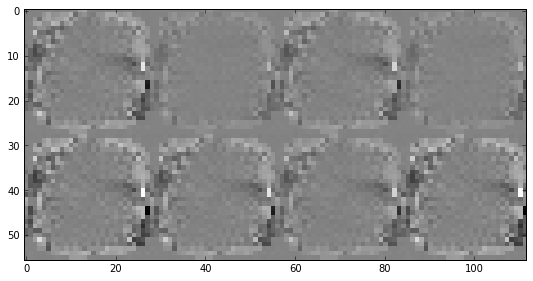

In [720]:
GammaGrid=GammaClassif.reshape([2,4,28,28])
GammaPlot=np.vstack([np.hstack([g for g in G]) for G in GammaGrid])
fig,ax=plt.subplots(figsize=(9,12))
img=ax.imshow(GammaPlot, cmap='gray',interpolation='none')
# plt.colorbar(img)

In [ ]:
#Filters are sort of uninspiring
#0,2,3,4 look similar


In [667]:
PosClassif=[np.dot(fl_inputs[lpos],GammaClassif)+BetaTree for lpos in lab_pos]
NegClassif=[np.dot(fl_inputs[lneg],GammaClassif)+BetaTree for lneg in lab_neg]

In [668]:
pos_score=[np.mean(A>=0,axis=0) for A in PosClassif]
neg_score=[np.mean(A>=0,axis=0) for A in NegClassif]#Want low

In [669]:
print np.round(np.hstack(pos_score),2)#leafxlab
print np.round(np.hstack(neg_score),2)

[[1.   1.  ]
 [1.   1.  ]
 [0.91 0.95]
 [1.   1.  ]
 [1.   1.  ]
 [0.98 0.99]
 [1.   1.  ]
 [1.   1.  ]
 [1.   1.  ]
 [1.   1.  ]
 [1.   1.  ]
 [0.96 0.97]]
[[0.51 0.69]
 [0.4  0.37]
 [0.   0.  ]
 [0.99 1.  ]
 [1.   1.  ]
 [0.01 0.01]
 [1.   1.  ]
 [0.29 0.42]
 [1.   1.  ]
 [1.   1.  ]
 [1.   1.  ]
 [0.01 0.01]]


In [633]:
score=np.round(np.hstack(pos_score+neg_score),2)### 4,8,9,10 always positive 
for i,s in enumerate(score):
    print str(i),s

0 [1.   1.   0.51 0.69]
1 [1.   1.   0.4  0.37]
2 [0.91 0.95 0.   0.  ]
3 [1.   1.   0.99 1.  ]
4 [1. 1. 1. 1.]
5 [0.98 0.99 0.01 0.01]
6 [1. 1. 1. 1.]
7 [1.   1.   0.29 0.42]
8 [1. 1. 1. 1.]
9 [1. 1. 1. 1.]
10 [1. 1. 1. 1.]
11 [0.96 0.97 0.01 0.01]


In [629]:
#'(a0 & a4 & a5 & a6) | (a1 & a11 & a3 & a9) | (a10 & a2 & a7 & a8)'
'(a0 & a5 ) | (a1 & a3 & a11) | (a2 & a7)'

(12, 1)

In [698]:
Classif=np.squeeze(np.dot(npX,GammaClassif)+BetaTree>=0)
poly1=(np.logical_and.reduce( [Classif[:,0],Classif[:,5],Classif[:,6]] ) ).astype('int')
poly2=(np.logical_and.reduce( [Classif[:,1],Classif[:,3],Classif[:,9]] ) ).astype('int')
poly3=(np.logical_and.reduce( [Classif[:,2],Classif[:,7],Classif[:,8]] ) ).astype('int')
npY01=((npY*0.5)+0.5).astype('int')

In [699]:
# for i in range(Classif.shape[-1]):
# for i in [0,4,5,6]:
# for i in [1,3,9,11]:    
# for i in [2,7,8,10]:
for i in [0,5]:
# for i in [1,3,11]:    
# for i in [2,7]:  
    pred=Classif[:,i]
    print str(i),classification_report(y_true=npY01,y_pred=pred)
    
print 'poly1',classification_report(y_true=npY01,y_pred=poly1)

0              precision    recall  f1-score   support

          0       1.00      0.40      0.57     10149
          1       0.62      1.00      0.76      9851

avg / total       0.81      0.69      0.66     20000

5              precision    recall  f1-score   support

          0       0.99      0.99      0.99     10149
          1       0.99      0.99      0.99      9851

avg / total       0.99      0.99      0.99     20000

poly1              precision    recall  f1-score   support

          0       0.99      0.99      0.99     10149
          1       0.99      0.99      0.99      9851

avg / total       0.99      0.99      0.99     20000



In [697]:
classification_report?

In [658]:
#Do composite image for each sub expr
#Do sens/spec calc

cls_report=classification_report(y_true=npY01,y_pred=poly1)

In [659]:
print cls_report

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     10149
          1       0.99      0.99      0.99      9851

avg / total       0.99      0.99      0.99     20000



In [622]:
bool_tree

'(a0 & a4 & a5 & a6) | (a1 & a11 & a3 & a9) | (a10 & a2 & a7 & a8)'

In [ ]:
#0,4,5,6 all look the same and get 0.99 f1 all on their own. Let's do more interesting stuff

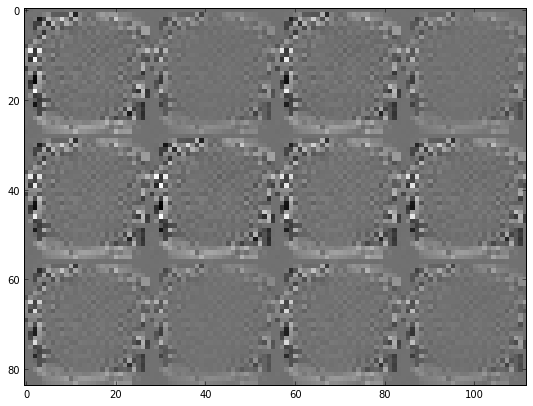

In [600]:
GammaGrid=GammaClassif.reshape([3,4,28,28])
GammaPlot=np.vstack([np.hstack([g for g in G]) for G in GammaGrid])
fig,ax=plt.subplots(figsize=(9,12))
img=ax.imshow(GammaPlot, cmap='gray',interpolation='none')
# plt.colorbar(img)

In [620]:
labs

[[0, 1], [6, 7]]

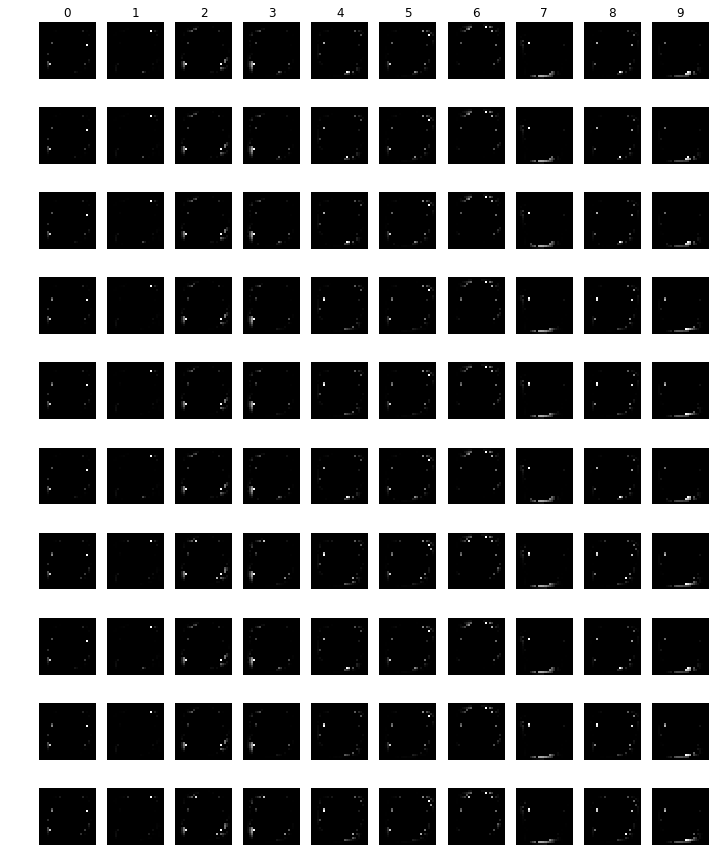

In [618]:
fig, axes = plt.subplots(10,10, figsize=(len(GammaTree),15))
Ims=[np.mean(Images[Labels==i],axis=0) for i in range(10)]
for i,ax1d in enumerate(axes):
    for j,ax in enumerate(ax1d):
        gamma=GammaImage[i]
        IsDev=(np.abs(gamma-gamma.mean())>gamma.std()).astype('float')
        ax.imshow(Ims[j]*IsDev, cmap='gray',interpolation='none')
        
        if i==0:
            ax.set_title(str(j))
        if j==0:
            ax.set_ylabel(str(i))

        
        ax.axis('off')
plt.suptitle(descrip)

In [607]:
print GammaTree.shape
print GammaClassif.shape
print GammaPlot.shape
print GammaGrid.shape

(12, 784)
(12, 784, 1)
(84, 112)
(3, 4, 28, 28)


In [593]:
np.arange(12).reshape([3,4])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [551]:
PosClassif[0].shape

(5851, 5, 1)

In [558]:
lab_neg

[5, 6]

In [540]:
out.shape

(5851, 5, 1)

In [534]:
.gamma.shape,beta.shape

((28, 28, 1), (1,))

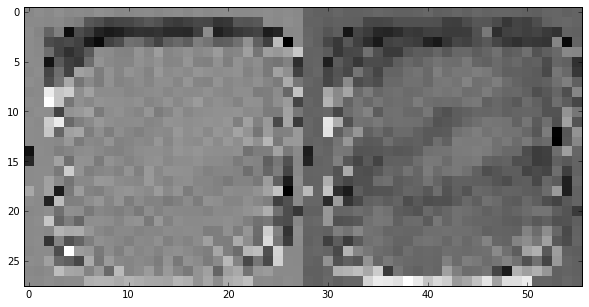

In [526]:
fig,ax=plt.subplots(figsize=(10,20))
ax.imshow(np.concatenate([Gamma01[1],Gamma01[2]],axis=1),cmap='gray',interpolation='none')

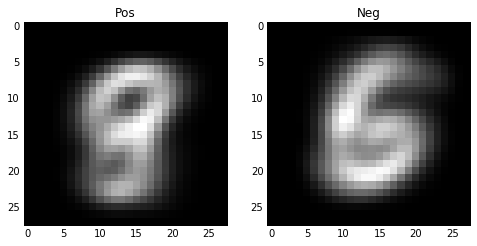

In [496]:
ave_Xpos=np.mean(Xpos,axis=0).reshape([28,28])
ave_Xneg=np.mean(Xneg,axis=0).reshape([28,28])

fig,axes=plt.subplots(1,2,figsize=(8,5))
ax_pos,ax_neg=axes
ax_pos.imshow(ave_Xpos,cmap='gray',interpolation='none')
ax_neg.imshow(ave_Xneg,cmap='gray',interpolation='none')
ax_pos.set_title('Pos')
ax_neg.set_title('Neg')

In [497]:
ave_Xpos.min(),ave_Xpos.max()

(0.0, 0.7486018)

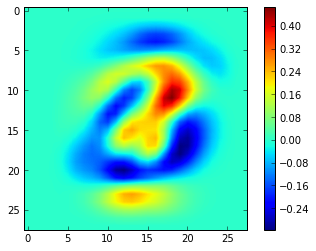

In [499]:
plt.imshow(ave_Xpos-ave_Xneg)
plt.colorbar()

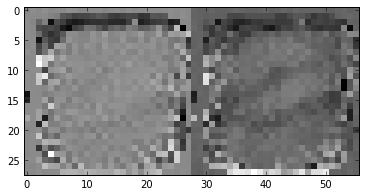

In [506]:
plt.imshow(np.concatenate([Gamma01[1],Gamma01[2]],axis=1),cmap='gray',interpolation='none')

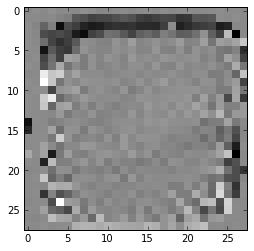

In [503]:
plt.imshow(Gamma01[1],cmap='gray',interpolation='none')

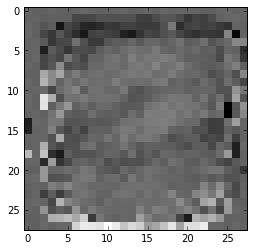

In [502]:
plt.imshow(Gamma01[2],cmap='gray',interpolation='none')

In [613]:
GammaImage=GammaTree.reshape([-1,28,28])

In [455]:
linear=GammaTree[0].reshape([28,28])


In [458]:
linear01=(linear-linear.min())/(linear.max()-linear.min())

In [483]:
Gamma01=[(l-l.min())/(l.max()-l.min()) for l in GammaTree]

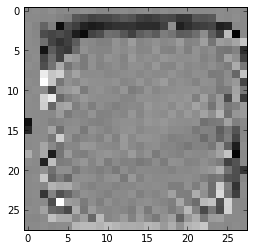

In [489]:
plt.imshow(Gamma01[4],cmap='gray',interpolation='none')

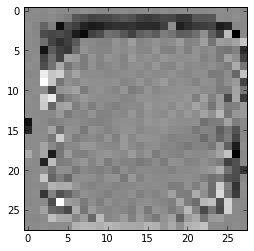

In [485]:
plt.imshow(Gamma01[0],cmap='gray',interpolation='none')

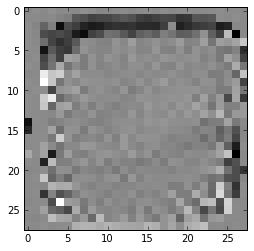

In [500]:
plt.imshow(Gamma01[1],cmap='gray',interpolation='none')

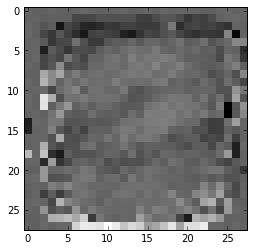

In [501]:
plt.imshow(Gamma01[2],cmap='gray',interpolation='none')

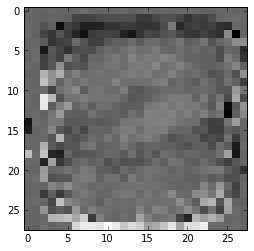

In [488]:
plt.imshow(Gamma01[3],cmap='gray',interpolation='none')

In [490]:
plt.imshow(Gamma01[5],cmap='gray',interpolation='none')

IndexError: list index out of range

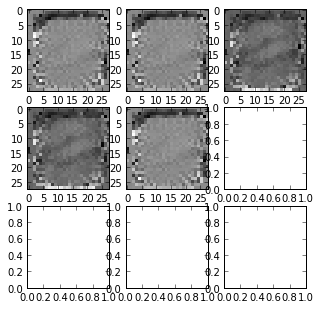

In [481]:
#fig=plt.figure(figsize=(8,10))
fig,axes=plt.subplots(3,3,figsize=(5,5))
axes=axes.ravel()
for i,gamma in enumerate(GammaTree):
    beta=BetaTree[i]

    ax=axes[i]
    linear01=(gamma-gamma.min())/(gamma.max()-gamma.min())
    #ax = fig.add_subplot(3,4,i+1)
    img=ax.imshow(linear01,cmap='gray',interpolation='none')
    #fig.colorbar(img, cax=ax, orientation='vertical');
    

#fig.colorbar(sm, ax=fig.get_axes())

In [ ]:
axes.ravel

/home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/local/lib/python2.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


(None, <a list of 11 Text yticklabel objects>)

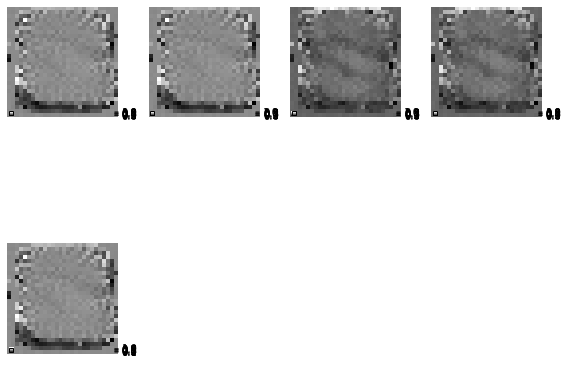

In [482]:
fig=plt.figure(figsize=(8,10))
for i,gamma in enumerate(GammaTree):
    beta=BetaTree[i]

    linear01=(gamma-gamma.min())/(gamma.max()-gamma.min())
    ax = fig.add_subplot(3,4,i+1)
    img=ax.imshow(linear01,cmap='gray',interpolation='none')
    fig.colorbar(img, cax=ax, orientation='vertical');
    #ax.colorbar()
    
plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])
#fig.colorbar(sm, ax=fig.get_axes())

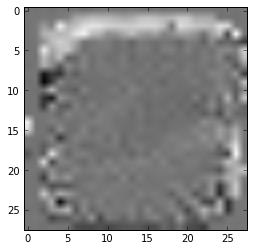

In [463]:
plt.imshow(linear01,cmap=plt.cm.binary)

# Logic Figure  Focus on Surgery figure to fix overfitting

In [25]:
###FigC###  
log_dir='./logs/Model_0514_151155_Mnist1kA3PCA4_LabsAll_50kiter';m=1000
#1./.781 |Sig0|=55 |Sig|=2432
###interesting. Similar to 162548 but builds in exception for half the 4's
##retrained in 
prosthetic_dir='./logs/Surg_0516_210833_Mnist1kA3PCA4_Labs4.56789_50kiter' #with same exact conditions,
##except that labels 0-3 and 70% of the images 5-9 were dropped from training set

###FigB###
# log_dir='./logs/Model_0514_210136_Mnist50kA1PCA6_LabsAll_50kiter';m=50000
#.96/.93 #65/386
##Also interesting 5.0,6.0
#1.5.0 has Or( [0,7,9] , [5,6,half7,8,9]) = [0,5,6,7,8,9] = 5.0\approx 0

###FigA###
#log_dir='./logs/Model_0514_220539_Mnist50kA1PCA6_LabsAll_50kiter';m=50000
#.985/.94    14/147
#Pretty awesome. Just AND. Should make for a good figure

labs=[[0,1,2,3,4],[5,6,7,8,9]]

In [26]:
descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str
record_dir=os.path.join(log_dir,'records')
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
lab_neg,lab_pos=labs

logic_dir=os.path.join(log_dir,'logic')
decision_dir=logic_dir+'/Arrays'
split_decision_dir=logic_dir+'/SingleArrays'


using log_dir: ./logs/Model_0514_151155_Mnist1kA3PCA4_LabsAll_50kiter  descrip: 50kiter id str: 514151155


In [4]:
##Ran this code in ipython after training with
#           %run topenet.py --is_train True --optimizer='adam' --num_iter 50000
#           --dataset='mnist4' --pca=4 --arch=3
#           --descrip='Mnist1kA3PCA4_Labs4.56789_50kiter' --prefix='Surg'


##For retrain to classify 4's
# train data shape==556x784


# val_Images=np.squeeze(mnist_datasets.validation.images)
# val_X=val_Images.reshape([-1,784])
# val5k_pred=sess.run(model.pred,feed_dict={model.phx: val_X})

# for ii in range(10):
#     avepred=np.mean(val5k_pred[val_Labels==ii])
#     print 'label ',ii,' perc true ',avepred
    
# for ii in range(10):
#     ...:     if len(trn_ids[ii])>0:
#     ...:         avepred=np.mean(sess.run(model.pred)[trn_ids[ii]])
#     ...:         print 'label' , ii, 'perc true ', 100*np.round(avepred,2)
    
# In [69]: for ii in range(10):
#     ...:     avepred=np.mean(val5k_pred[val_Labels==ii])
#     ...:     print 'label ',ii,' perc true ',100*np.round(avepred,2)
#     ...:     
# label  0  perc true  100.0
# label  1  perc true  99.0
# label  2  perc true  97.0
# label  3  perc true  100.0
# label  4  perc true  16.0
# label  5  perc true  99.0
# label  6  perc true  98.0
# label  7  perc true  97.0
# label  8  perc true  99.0
# label  9  perc true  98.0

# In [70]: trn_ids=[np.where(exp.val_data['orig label']==n)[0] for n in range(10)]

# In [71]: trn_ids=[np.where(exp.data['orig label']==n)[0] for n in range(10)]

# In [72]: len(trn_ids[0])
# Out[72]: 0

# In [73]: len(trn_ids[8])
# Out[73]: 120

# In [74]: for ii in range(10):
#     ...:     if len(trn_ids[ii])>0:
#     ...:         avepred=np.mean(sess.run(model.pred)[trn_ids[ii]])
#     ...:         print 'label' , ii, 'perc true ', 100*np.round(avepred,2)
#     ...:         
# label 4 perc true  0.0
# label 5 perc true  100.0
# label 6 perc true  100.0
# label 7 perc true  99.0
# label 8 perc true  99.0
# label 9 perc true  99.0


# In [79]: TrnBool=sess.run(model.pred).astype(np.bool)

# In [80]: ValBool=sess.run(model.pred,feed_dict={model.phx: val_X}).astype(np.bool) 
# val_mask=ValBool.astype('float')[:,None,None]
# In [84]: val_ids=[np.where(val_Labels==i)[0] for i in range(10)] 
# In [85]: trn_Labels=exp.data['orig label']
# In [86]: trn_ids=[np.where(trn_Labels==i)[0] for i in range(10)] 
# In [87]: val_true_frac=[np.mean(val_mask[ix]) for ix in val_ids] 
# In [94]: val_mask=val_mask.reshape([-1,1,1])
# In [97]: trn_Bools=TrnBool

# In [98]: trn_mask=trn_Bools.astype('float')[:,None,None] 

# In [99]: trn_true_frac=[np.mean(trn_mask[ix]) for ix in trn_ids]    
# /home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
#   out=out, **kwargs)
# /home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
#   ret = ret.dtype.type(ret / rcount)
# In [100]: trn_mask=trn_mask.reshape([-1,1,1])
# In [104]: trn_Images=sess.run(exp.data['input']).reshape([-1,28,28])
# In [105]: trn_X=sess.run(exp.data['input'])
# In [106]: trn_Y=sess.run(exp.data['label'])
# In [107]: trn_Labels=exp.data['orig label']
# In [108]: trn_pos_msk_imgs=trn_mask*trn_Images
# In [109]: trn_neg_msk_imgs=(1.-trn_mask)*trn_Images
# In [110]: trn_pos_Agg=[np.mean(trn_pos_msk_imgs[ix],axis=0) for ix in trn_ids]
# /home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/local/lib/python2.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
#   ret, rcount, out=ret, casting='unsafe', subok=False)
# In [111]: trn_neg_Agg=[np.mean(trn_neg_msk_imgs[ix],axis=0) for ix in trn_ids] 
# In [112]: trn_maxes=[max(pmi.max(),nmi.max()) for pmi,nmi in zip(trn_pos_Agg,trn_neg_Agg)] 
# /home/chris/.virtualenvs/tensorflow-source1.4-cd8.0-cn7.0.1/local/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
#   return umr_maximum(a, axis, None, out, keepdims, initial)
# In [113]: trn_maxes
# Out[113]: 
# [nan,
#  nan,
#  nan,
#  nan,
#  0.8533333826065064,
#  0.6843137654875006,
#  0.8592545189945907,
#  0.805974029143837,
#  0.8471895884877692,
#  0.8215054250372353]

# In [114]: trn_pos_Agg=[pA/m for pA,m in zip(trn_pos_Agg,trn_maxes)]
# In [115]: trn_neg_Agg=[nA/m for nA,m in zip(trn_neg_Agg,trn_maxes)] 
# In [116]: composite=np.vstack([np.hstack(trn_pos_Agg),np.ones([1,280]),np.hstack(trn_neg_Agg)])
# In [121]: from logic_inspect import show_composite
# In [126]: np.save(log_dir+'/RetrainOf151155_by_210833_composite.npy',composite)


In [27]:
def show_composite(composite,val_true_frac,trn_true_frac,ax=None,hide_xlabel=False):
    if not ax:
        fig,ax=plt.subplots()
    val_names=[]
    trn_names=[]
    for ix in range(len(val_true_frac)):
        if np.isnan(val_true_frac[ix]):
            val_names.append('NA')
        else:
            val_names.append(str((100*np.round(val_true_frac[ix],2)).astype('int')))
        if np.isnan(trn_true_frac[ix]):
            trn_names.append('NA')
        else:
            trn_names.append(str((100*np.round(trn_true_frac[ix],2)).astype('int')))
    print 'names',trn_names,val_names
    name_list=[tn+'('+vn+')' for vn,tn in zip(val_names,trn_names)]
    location=28*np.arange(10)+14
    ax.imshow(composite,cmap='gray')
    ax.set_xticks(location)
    ax.set_xticklabels(name_list)
    if hide_xlabel:
        ax.set_xticks([])
        ax.set_xticklabels([])
    ax.set_yticks([14,28+14])
    #ax.set_yticklabels(['TRUE','FALSE'])
    ax.set_yticklabels(['T','F'])
    ax.tick_params(axis=u'both', which=u'both',length=0)

    for item in ax.get_xticklabels():
        item.set_fontsize(11)
    for item in ax.get_yticklabels():
        item.set_fontsize(20)


In [31]:
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
mnist_datasets=mnist_data.read_data_sets('./data/mnist/',reshape=False,validation_size=5000)
val_Images=np.squeeze(mnist_datasets.validation.images)
val_Labels=mnist_datasets.validation.labels
val_ids=[np.where(val_Labels==i)[0] for i in range(10)]

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [33]:
val_true_frac=[np.mean(val_mask[ix]) for ix in val_ids]

NameError: name 'val_mask' is not defined

[1.0, 0.9857904085257548, 0.9651639344262295, 0.9959432048681541, 0.16074766355140188, 0.9930875576036866, 0.9840319361277445, 0.9745454545454545, 0.9935064935064936, 0.9818181818181818]
names ['NA', 'NA', 'NA', 'NA', '0', '100', '100', '99', '99', '99'] ['100', '99', '97', '100', '16', '99', '98', '97', '99', '98']


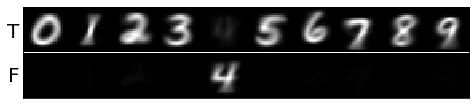

In [36]:
trn_true_frac=np.array([np.nan,np.nan,np.nan,np.nan,0.,1.00,1.00,.99,.99,.99])
val_true_frac=np.array([1.00,.99,.97,1.00,.16,.99,.98,.97,.99,.98])
# composite=np.load(prosthetic_dir+'/RetrainOf151155_by_210833_composite.npy')
val_mask=np.load(prosthetic_dir+'/RetrainOf151155_by_210833_ValBool.npy').reshape([5000,1,1])

val_true_frac=[np.mean(val_mask[ix]) for ix in val_ids]
print val_true_frac
# val_pos_msk_imgs=val_mask*val_Images

val_pos_msk_imgs=val_mask*val_Images
val_neg_msk_imgs=(1.-val_mask)*val_Images
val_pos_Agg=[np.mean(val_pos_msk_imgs[ix],axis=0) for ix in val_ids]
val_neg_Agg=[np.mean(val_neg_msk_imgs[ix],axis=0) for ix in val_ids]
val_maxes=[max(pmi.max(),nmi.max()) for pmi,nmi in zip(val_pos_Agg,val_neg_Agg)]
val_pos_Agg=[pA/m for pA,m in zip(val_pos_Agg,val_maxes)]
val_neg_Agg=[nA/m for nA,m in zip(val_neg_Agg,val_maxes)]
val_composite=np.vstack([np.hstack(val_pos_Agg),np.ones([1,280]),np.hstack(val_neg_Agg)])

fig,ax=plt.subplots(figsize=(8,2))
show_composite(val_composite,val_true_frac,trn_true_frac,ax=ax,
              hide_xlabel=True,
              )

save_pth=logic_dir+'/val_TT_noXLabel_'+'4from56789_RetrainOf151155_by_210833'
# save_pth=logic_dir+'/val_TT_'+'4from56789_RetrainOf151155_by_210833'

for ext in ['.png','.pdf']:
    plt.savefig(save_pth+ext)


names ['NA', 'NA', 'NA', 'NA', '0', '100', '100', '99', '99', '99'] ['100', '99', '97', '100', '16', '99', '98', '97', '99', '98']
['NA(100)', 'NA(99)', 'NA(97)', 'NA(100)', '0(16)', '100(99)', '100(98)', '99(97)', '99(99)', '99(98)']


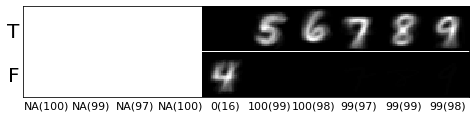

In [58]:
trn_true_frac=np.array([np.nan,np.nan,np.nan,np.nan,0.,1.00,1.00,.99,.99,.99])
val_true_frac=np.array([1.00,.99,.97,1.00,.16,.99,.98,.97,.99,.98])
composite=np.load(prosthetic_dir+'/RetrainOf151155_by_210833_composite.npy')

fig,ax=plt.subplots(figsize=(8,2))
show_composite(composite,val_true_frac,trn_true_frac,ax=ax,
#               hide_xlabel=True,
              )
save_pth=logic_dir+'/TT_'+'4from56789_RetrainOf151155_by_210833'+'.pdf'
# save_pth=logic_dir+'/TT_noXLabel_'+'4from56789_RetrainOf151155_by_210833'+'.pdf'
# save_pth=logic_dir+'/TT_'+'4from56789_RetrainOf151155_by_210833'+'.png'
# save_pth=logic_dir+'/TT_noXLabel_'+'4from56789_RetrainOf151155_by_210833'+'.png'
plt.savefig(save_pth)
# plt.show()


In [45]:
with open( logic_dir+'/ValBool.pkl','rb') as f:
    ValBool=pickle.load(f)
with open( logic_dir+'/sympy_abstract_Bool_Tree.pkl','rb') as f:
    abstract_Bool_Tree=pickle.load(f)
    abt=abstract_Bool_Tree
with open( logic_dir+'/TrnBool.pkl','rb') as f:
    TrnBool=pickle.load(f)

# with open( logic_dir+'/sympy_Bool_Tree.pkl','rb') as f:
#     Bool_Tree=pickle.load( f)
#     BT=Bool_Tree
# with open( logic_dir+'/terminal_leafs.pkl','rb') as f:
#     terminal_leafs=pickle.load(f)
# with open( logic_dir+'/leaf_substitute_symbols.pkl','rb') as f:
#     subdict=pickle.load(f)
# with open (logic_dir+'/essential.pkl','rb') as f:
#     essential=pickle.load(f)


with open( logic_dir+'/expr_composite.pkl','rb') as f:
    expr_completed=pickle.load(f)
Prosthetic_ValBool=np.load(prosthetic_dir+'/RetrainOf151155_by_210833_ValBool.npy')
Prosthetic_TrnBool=np.load(prosthetic_dir+'/RetrainOf151155_by_210833_trnBool151155.npy')
PeOT=list(preorder_traversal(abstract_Bool_Tree))
ROOT=PeOT[0]

In [21]:
assert(ROOT.func==sympy.And)
val_logic=[ValBool[arg] for arg in ROOT.args]

In [46]:
old_pred=np.logical_and.reduce(val_logic)
old_score=np.mean(val_Y==old_pred)
print 'old val score', old_score

new_logic=[ValBool[a] for a in ROOT.args if expr_completed[a]['repr']!='1.0']
new_logic.append(Prosthetic_ValBool.ravel())
ProsValBool=np.logical_and.reduce(new_logic)
new_pred=(ProsValBool).astype('int')
new_score=np.mean(val_Y==new_pred)
print 'new val score', new_score #WOOO

# new_logic=[TrnBool[a] for a in ROOT.args if expr_completed[a]['repr']!='1.0']
# new_logic.append(Prosthetic_TrnBool.ravel())
# ProsTrnBool=np.logical_and.reduce(new_logic)
# new_trn_pred=(ProsTrnBool).astype('int')
# new_score=np.mean(trn_Y==new_trn_pred)
# print new_score #WOOO

old val score 0.799
new val score 0.835
0.229918


In [40]:
# from toydata import get_toy_data
# data_fn=get_toy_data('mnist')
# assert(m==1000)
# trn_data=data_fn(m=m,return_numpy=True)#mx784
# trn_X=trn_data['input']
# trn_Images=trn_X.reshape([-1,28,28])
# trn_Y=trn_data['label']
# trn_Labels=trn_data['orig label'].ravel()

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Using Labels  [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]


In [60]:
##What is new composite image

val_Bools=ProsValBool
val_mask=val_Bools.astype('float')[:,None,None]
val_true_frac=[np.mean(val_mask[ix]) for ix in val_ids]
assert(len(val_mask.shape)==len(val_Images.shape))#else potential for memory crash

# trn_Bools=TrnBool[arg]
# trn_mask=trn_Bools.astype('float')[:,None,None]
# trn_true_frac=[np.mean(trn_mask[ix]) for ix in trn_ids]
# assert(len(trn_mask.shape)==len(trn_Images.shape))#else potential for memory crash

###Switch by commenting###
##Use either val or train images
val_pos_msk_imgs=val_mask*val_Images
val_neg_msk_imgs=(1.-val_mask)*val_Images
val_pos_Agg=[np.mean(val_pos_msk_imgs[ix],axis=0) for ix in val_ids]
val_neg_Agg=[np.mean(val_neg_msk_imgs[ix],axis=0) for ix in val_ids]
val_maxes=[max(pmi.max(),nmi.max()) for pmi,nmi in zip(val_pos_Agg,val_neg_Agg)]
val_pos_Agg=[pA/m for pA,m in zip(val_pos_Agg,val_maxes)]
val_neg_Agg=[nA/m for nA,m in zip(val_neg_Agg,val_maxes)]
composite=np.vstack([np.hstack(val_pos_Agg),np.ones([1,280]),np.hstack(val_neg_Agg)])

# trn_pos_msk_imgs=trn_mask*trn_Images
# trn_neg_msk_imgs=(1.-trn_mask)*trn_Images
# trn_pos_Agg=[np.mean(trn_pos_msk_imgs[ix],axis=0) for ix in trn_ids]
# trn_neg_Agg=[np.mean(trn_neg_msk_imgs[ix],axis=0) for ix in trn_ids]
# trn_maxes=[max(pmi.max(),nmi.max()) for pmi,nmi in zip(trn_pos_Agg,trn_neg_Agg)]
# trn_pos_Agg=[pA/m for pA,m in zip(trn_pos_Agg,trn_maxes)]
# trn_neg_Agg=[nA/m for nA,m in zip(trn_neg_Agg,trn_maxes)]
# composite=np.vstack([np.hstack(trn_pos_Agg),np.ones([1,280]),np.hstack(trn_neg_Agg)])



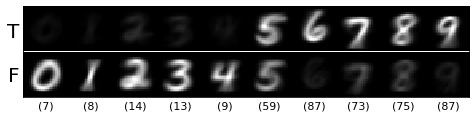

In [61]:
hide_xlabel=False

fig,ax=plt.subplots(figsize=(8,2))
val_names=[]
for ix in range(len(val_true_frac)):
    if np.isnan(val_true_frac[ix]):
        val_names.append('NA')
    else:
        val_names.append(str((100*np.round(val_true_frac[ix],2)).astype('int')))

name_list=['('+vn+')' for vn in val_names]
location=28*np.arange(10)+14
ax.imshow(composite,cmap='gray')
ax.set_xticks(location)
ax.set_xticklabels(name_list)
if hide_xlabel:
    ax.set_xticks([])
    ax.set_xticklabels([])
ax.set_yticks([14,28+14])
#ax.set_yticklabels(['TRUE','FALSE'])
ax.set_yticklabels(['T','F'])
ax.tick_params(axis=u'both', which=u'both',length=0)

for item in ax.get_xticklabels():
    item.set_fontsize(11)
for item in ax.get_yticklabels():
    item.set_fontsize(20)

if hide_xlabel:
    save_pth=logic_dir+'/TT_noXLabel_'+'Frankenstein_Of151155_by_210833'+'.pdf'
#     save_pth=logic_dir+'/TT_noXLabel_'+'Frankenstein_Of151155_by_210833'+'.png'
else:
#     save_pth=logic_dir+'/TT_'+'Frankenstein_Of151155_by_210833'+'.pdf'
    save_pth=logic_dir+'/TT_'+'Frankenstein_Of151155_by_210833'+'.png'

plt.savefig(save_pth)
